<a href="https://colab.research.google.com/github/farhanfuadabir/NurseCareChallenge2020/blob/main/NursingActivity_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Add Google Drive Folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


# **Functions**



---


> Merge and Process



```
merge_all_axis(path, display_data=True)
```
---


In [ ]:
def merge_all_axis(path, display_data=True):
  
  """
  A function to merge x, y and z axis data dropping the duplicate columns. 

  Parameters
  ----------
  path : str
    The path to the files 'Acc_x.joblib', 'Acc_y.joblib', 'Acc_z.joblib' and
    'label.joblib'
  display_data : bool, optional
    Whether to print the merged dataframe or not. Default: True.


  Returns
  -------
  A pandas dataframe with x, y and z axis data.

  """

  import pandas as pd
  from joblib import load, dump 

  data_x = load(path + 'Acc_x.joblib')
  data_y = load(path + 'Acc_y.joblib')
  data_z = load(path + 'Acc_z.joblib')
  label = load(path + 'Label.joblib')

  data = pd.concat([data_x, data_y, data_z, label], axis = 1)
  data = data.loc[:, ~data.columns.duplicated()]

  if display_data == True:  display(data)

  return data


---


> Plot in **Single plot**


```
# This is formatted as code
```


---


In [ ]:
def plot_data(dataframe, token='take', token_value=0, xaxis='index'):

  """
  A function to plot data from a pandas dataframe using tokens.

  Parameters
  ----------
  dataframe : pandas.core.frame.DataFrame
    The dataframe to work on. For this case, it must contain columns - 'user_id', 
    'datetime', 'take', 'x', 'y', 'z', 'label'.
  token : str
    The column name to filter the data. Can be: 'user_id', 'take' or 'label.
    Default: 'take'
  token_value : int
    The value of the token to filter the data. Default:0
  xaxis : str, optional
    If 'index', x-ticks take index values. If 'datetime', x-ticks take datetime.
    Default: 'index'

  Returns
  -------
  str
    String containing filtered 'user_id', 'take' and 'label' based on the token
  plot
    A matplotlib figure containing 3 plots for 3-axis accelerometer data

  """

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  
  %matplotlib inline

  data = dataframe.loc[dataframe[token]==token_value].sort_values(by=['datetime'])
  
  
  if xaxis == 'datetime':
    #format = '%H:%M:%S.%f'
    #time = data.datetime.apply(lambda x: x.strftime(format)[:-3])
    time = data.datetime
    x_axis = time.loc[data[token]==token_value]
  elif xaxis == 'index':
    x_axis = data.index

  fig = plt.figure(figsize=(14, 6), facecolor='w', edgecolor='k')

  plt.plot(x_axis, data['x'], label = 'Acc_x')
  plt.plot(x_axis, data['y'], label = 'Acc_y')
  plt.plot(x_axis, data['z'], label = 'Acc_z')
  
  print('user_id = ' + str(data['user_id'].unique()) + '\ntake = ' + 
        str(data['take'].unique()) + '\nlabel = ' + str(data['label'].unique()), 
        end='\n\n')
  
  title_string = 'Plot for ' + token + ' = ' + str(token_value)
  plt.title(title_string, fontsize=15)
  plt.xlabel('Time')
  plt.ylabel('Accelerometer Value')
  plt.legend(frameon=True, framealpha=0.4, loc=('upper right'))
  plt.gcf().autofmt_xdate()
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  
  plt.show()

---


> Plot in **Sub plot** of **Singe Activities** [3 Takes]


```
plot_activity_single_user(dataframe, user_id = 1, label = 1)
```


---

In [ ]:
def plot_activity_single_user(dataframe, user_id = 1, label = 1):

  """
  A function to plot data from a pandas dataframe using user_id and label as well
  as to output a plot containing 3-axis accelerometer data.

  Parameters
  ----------
  dataframe : pandas.core.frame.DataFrame
    The dataframe to work on. For this case, it must contain columns - 'user_id', 
    'datetime', 'take', 'x', 'y', 'z', 'label'.
  user_id : int
    The value of the 'user_id' to filter the data. Default:1
  label : int
    The value of the 'label; to filter the data. Default:1

  Returns
  -------
  str
    String containing filtered 'user_id', 'take' and 'label' of the figure
  plot
    A matplotlib figure containing 3-axis accelerometer data for the 'user_id'
    and 'label'

  """

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline

  data = dataframe.sort_values(by=['datetime']).reset_index(drop=True)
  
  # Choose 3 take randomly
  mask = (data['user_id'] == user_id) & (data['label'] == label)
  random_pick = np.random.choice(data['take'].loc[mask].unique(), 3, replace=False)
  
  # Accumulate randomly chosen takes
  data_new = pd.DataFrame()
  line_x = []
  
  for i in random_pick:
    temp = data.loc[((data['take'] == i) & mask)]
    line_x.append(temp.shape[0])
    data_new = data_new.append(temp, ignore_index=True)
  
  
  # Print tokens
  print('\n\nuser_id = ' + str(data_new['user_id'].unique()) + '\ntake = ' + 
        str(data_new['take'].unique()) + '\nlabel = ' + 
        str(data_new['label'].unique()), end='\n\n')
  

  # Plot

  fig = plt.figure(figsize=(14, 6), facecolor='w', edgecolor='k')

  #plt.style.use('seaborn-notebook')

  plt.plot(data_new['x'], label = 'Acc_x')
  plt.plot(data_new['y'], label = 'Acc_y')
  plt.plot(data_new['z'], label = 'Acc_z')
  plt.axvline(line_x[0], color='k', linestyle='--')
  plt.axvline(line_x[0] + line_x[1], color='k', linestyle='--')

  title_string = 'user_id = ' + str(user_id) + '  |  label = ' + str(label)
  plt.title(title_string, fontsize=15)
  plt.xlabel('Time')
  plt.ylabel('Accelerometer Value')
  plt.legend(frameon=True, framealpha=0.4, loc=('upper right'))
  plt.gcf().autofmt_xdate()
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  
  plt.show()


---


> Plot in **Sub plot** of **All Activities** [3 Takes] and **Export**


```
plot_activity_all_user(dataframe, label = 1, savePath = None)
```


---

In [ ]:
def plot_activity_all_user(dataframe, label = 1, savePath = None):

  """
  A function to plot data from a pandas dataframe using labels and outputs a plot
  containing equal number of subplots as the user_id for 3-axis accelerometer data.

  Parameters
  ----------
  dataframe : pandas.core.frame.DataFrame
    The dataframe to work on. For this case, it must contain columns - 'user_id', 
    'datetime', 'take', 'x', 'y', 'z', 'label'.
  label : int
    The value of the label to filter the data. Default: 1
  savePath : str, optional
    The path to export the plot. If assigned None, function will not export.
    Default: None

  Returns
  -------
  str
    String containing filtered 'user_id', 'take' and 'label' of the subplots
  plot
    A matplotlib figure containing equal number of subplots as the user_id for 
    3-axis accelerometer data

  """

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline

  user_id = dataframe['user_id'].unique()
  data = dataframe.sort_values(by=['datetime']).reset_index(drop=True) 

  #plt.style.use('seaborn-notebook')
  fig, ax = plt.subplots(nrows= user_id.shape[0], ncols=1, figsize=(14, user_id.shape[0]*4), 
                         facecolor='w', edgecolor='k', dpi=100)

  print('user_id: ', user_id)

  for index in range (0, user_id.shape[0]):
    #print('index', index)
    # Choose 3 takes randomly
    mask = (data['user_id'] == user_id[index]) & (data['label'] == label)
    unique_takes = data['take'].loc[mask].unique()
    #print(user_id[index], unique_takes.shape[0])
    if unique_takes.shape[0] > 3:
      random_pick = np.random.choice(unique_takes, 3, replace=False)
    elif unique_takes.shape[0] > 0:
      random_pick = unique_takes
    elif unique_takes.shape[0] == 0:
      title_string = 'user_id = ' + str(user_id[index]) + '  |  label = ' + str(label)
      ax[index].set_title(title_string, fontsize=15)
      continue
    # if unique_takes.shape[0] > 0:

    # Accumulate randomly chosen takes
    data_new = pd.DataFrame()
    line_x = []
    
    for i in random_pick:
      temp = data.loc[((data['take'] == i) & mask)]
      line_x.append(temp.shape[0])
      data_new = data_new.append(temp, ignore_index=True)
    
    
    # Print tokens
    print('\nuser_id = ' + str(data_new['user_id'].unique()) + '\ntake = ' + 
        str(data_new['take'].unique()) + '\nlabel = ' + 
        str(data_new['label'].unique()), end='\n\n')
    
    # Plot

    ax[index].plot(data_new['x'], label = 'Acc_x')
    ax[index].plot(data_new['y'], label = 'Acc_y')
    ax[index].plot(data_new['z'], label = 'Acc_z')
    if unique_takes.shape[0] >= 3:
      ax[index].axvline(line_x[0], color='k', linestyle='--')
      ax[index].axvline(line_x[0] + line_x[1], color='k', linestyle='--')
    elif unique_takes.shape[0] == 2:
      ax[index].axvline(line_x[0], color='k', linestyle='--')


    title_string = 'user_id = ' + str(user_id[index]) + '  |  label = ' + str(label)
    ax[index].set_title(title_string, fontsize=15)
    ax[index].set_xlabel('Time')
    ax[index].set_ylabel('Accelerometer Value')
    ax[index].legend(frameon=True, framealpha=0.4, loc=('upper right'))
    #fig.autofmt_xdate()
    ax[index].xaxis.set_major_locator(plt.MaxNLocator(10))
  
  plt.subplots_adjust(hspace=0.3)
  plt.tight_layout()
  plt.show()

  if savePath is not None:
    fig.savefig(savePath + 'label_' + str(label) +'.png')


#**Example**



---


> **Import 3** axis data and **Merge**

---



In [ ]:
import pandas as pd
import numpy as np
from joblib import load, dump 
import matplotlib.pyplot as plt
%matplotlib inline


# At first declare the path containing the joblib files
path = {
    'Train_Lab': '/content/drive/My Drive/NCC Dataset 2020/Train/Lab/',
    'Train_Field': '/content/drive/My Drive/NCC Dataset 2020/Train/Field/',
    'Test_Field': '/content/drive/My Drive/NCC Dataset 2020/Test/Field/'
}

# Call the merging function
merged_data = merge_all_axis(path['Train_Field'], display_data=True)

FileNotFoundError: ignored



---


> **Plot** and **Export**


---



user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [45  5  8]
label = [4]


user_id = [7]
take = [429 198 213]
label = [4]


user_id = [8]
take = [546 600 573]
label = [4]


user_id = [18]
take = [748 746 760]
label = [4]


user_id = [51]
take = [935]
label = [4]



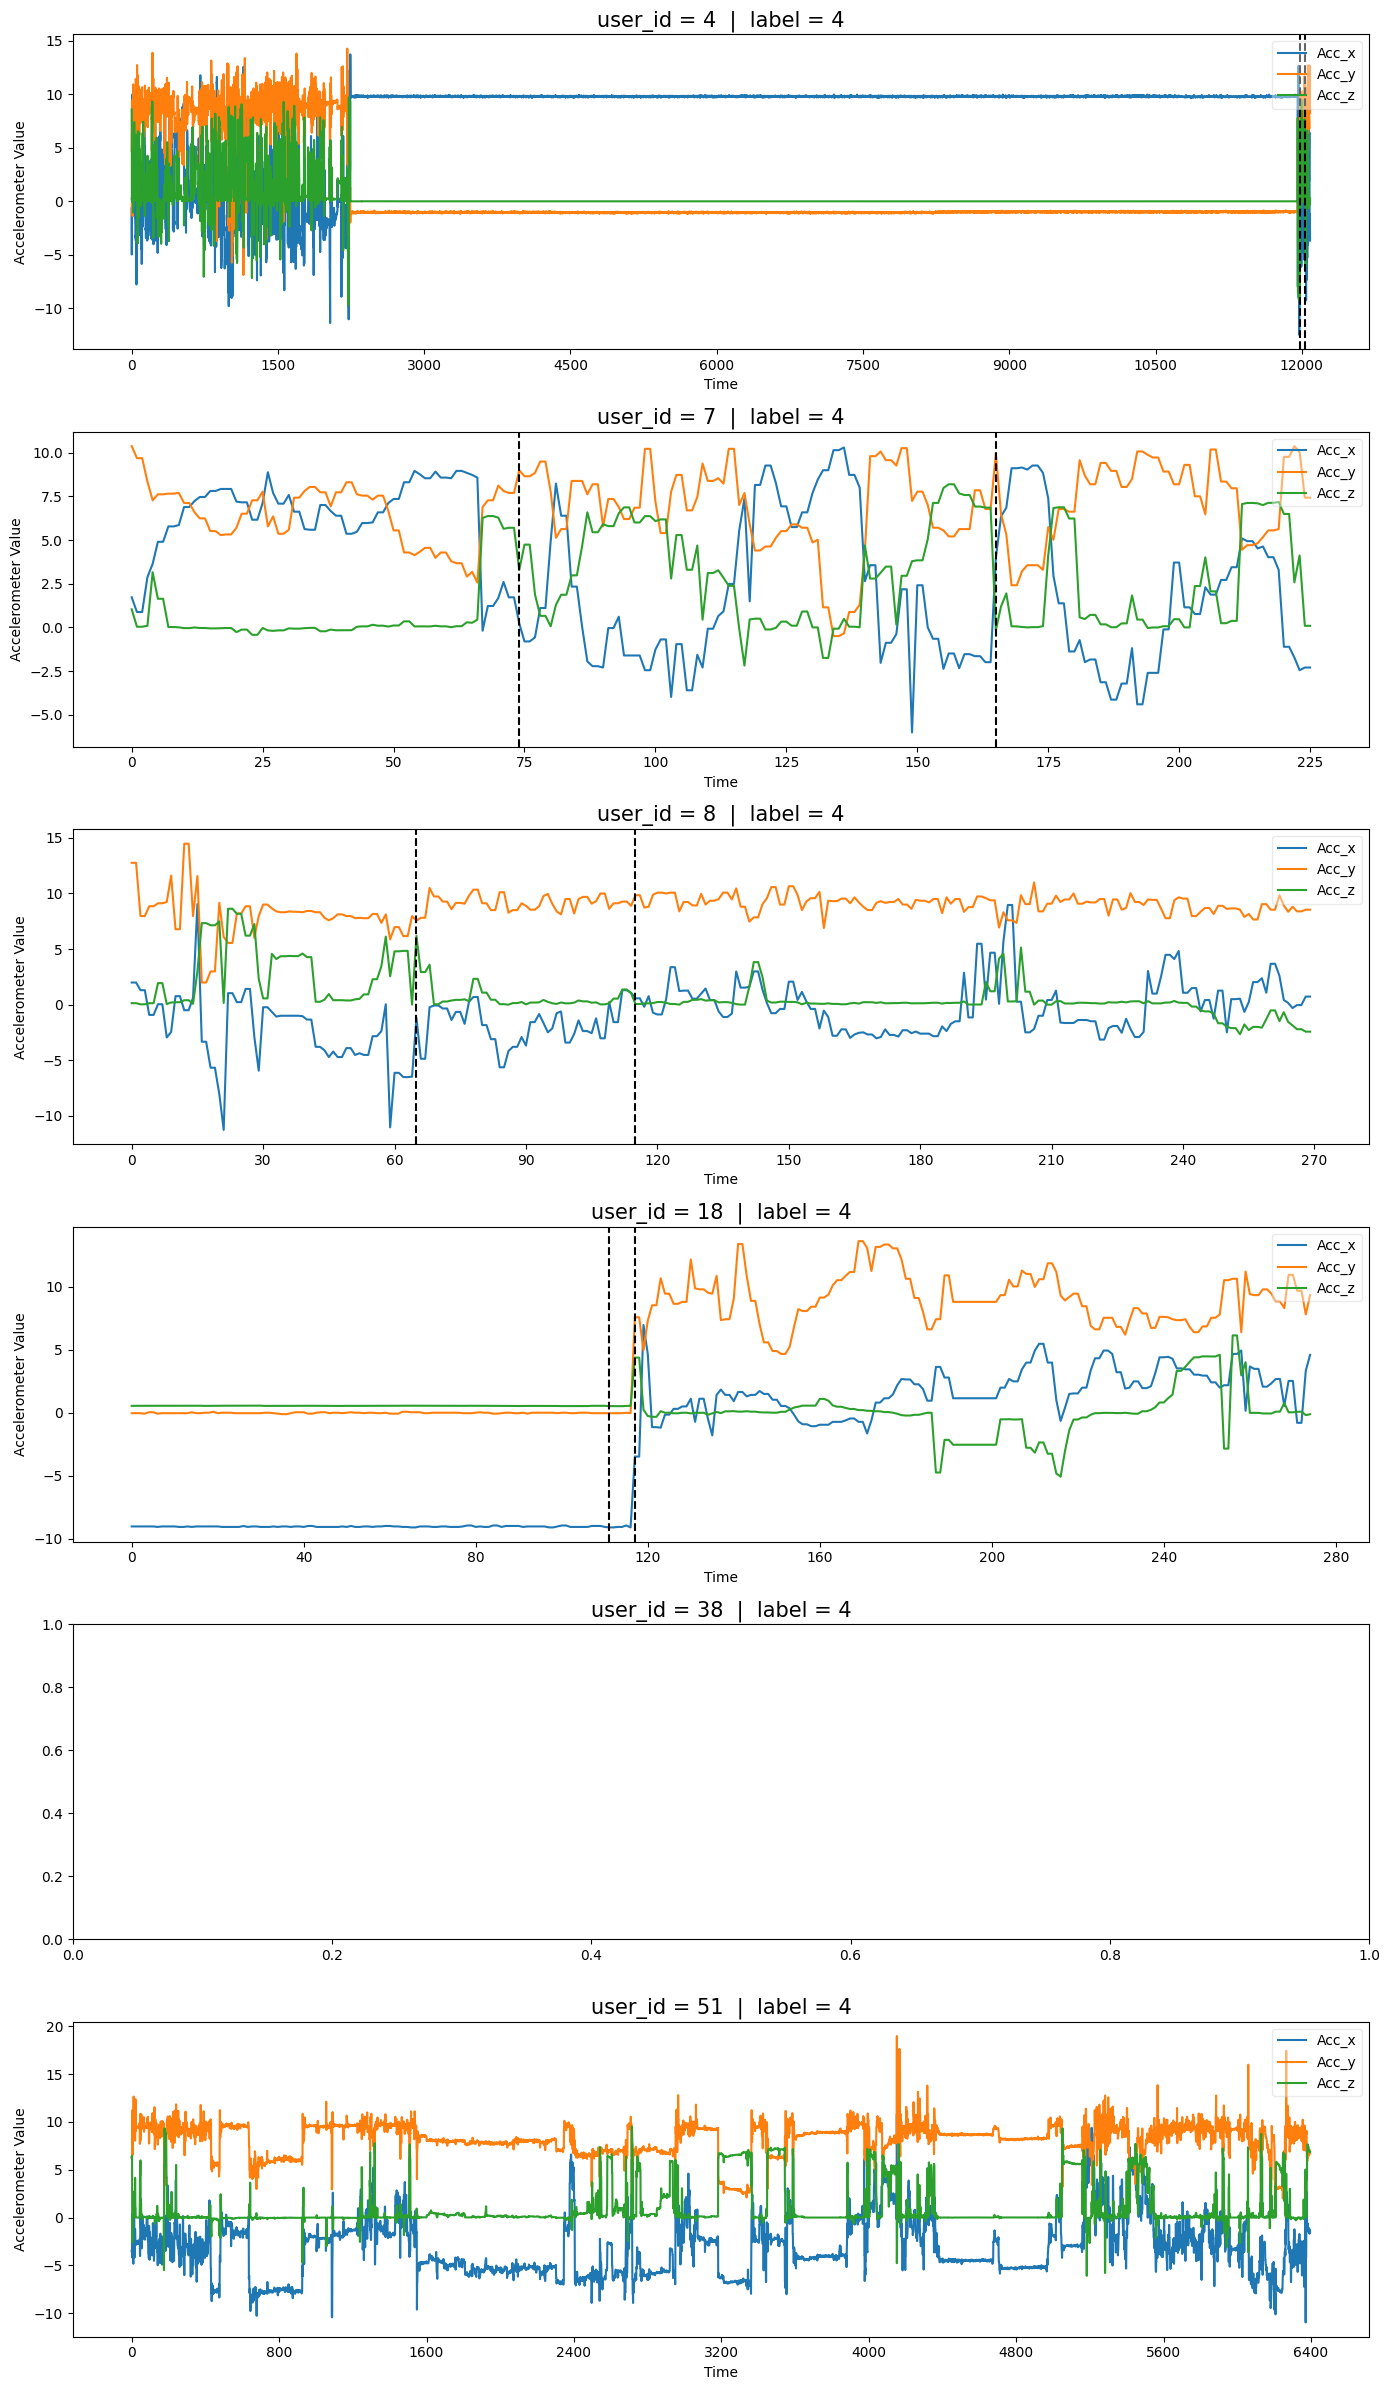

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [49 25 59]
label = [5]


user_id = [7]
take = [220  77 239]
label = [5]


user_id = [8]
take = [569 725 675]
label = [5]


user_id = [18]
take = [816 761 790]
label = [5]



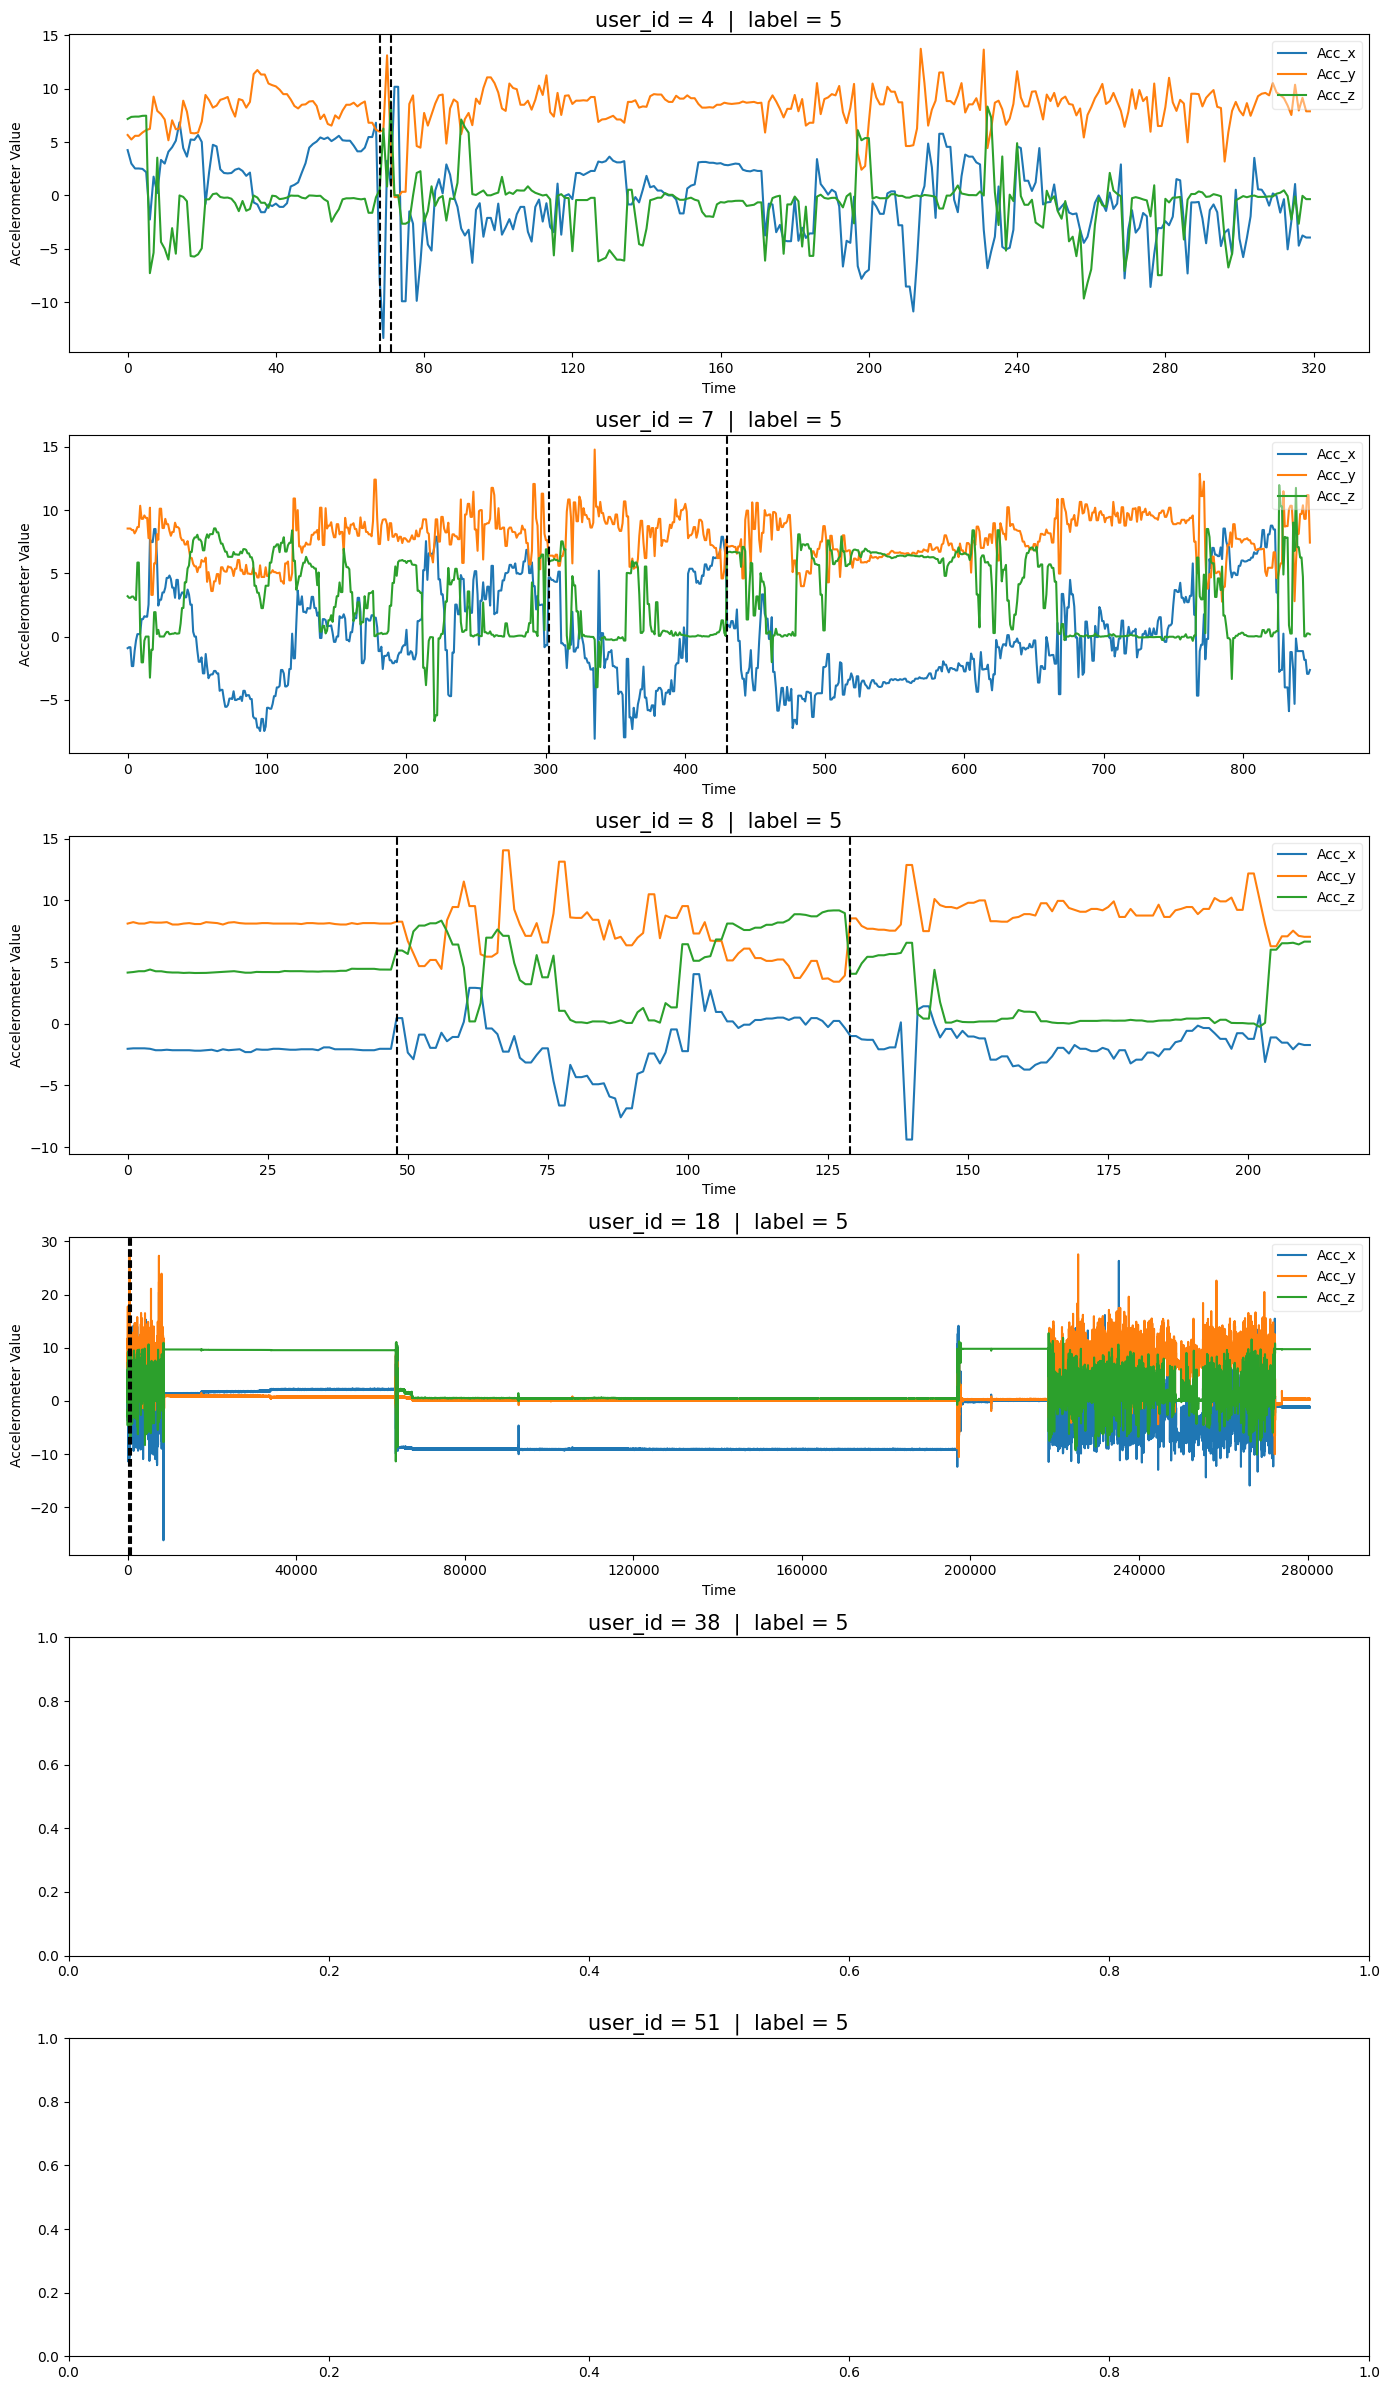

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [ 9 73]
label = [6]


user_id = [7]
take = [164 276  84]
label = [6]


user_id = [8]
take = [617]
label = [6]



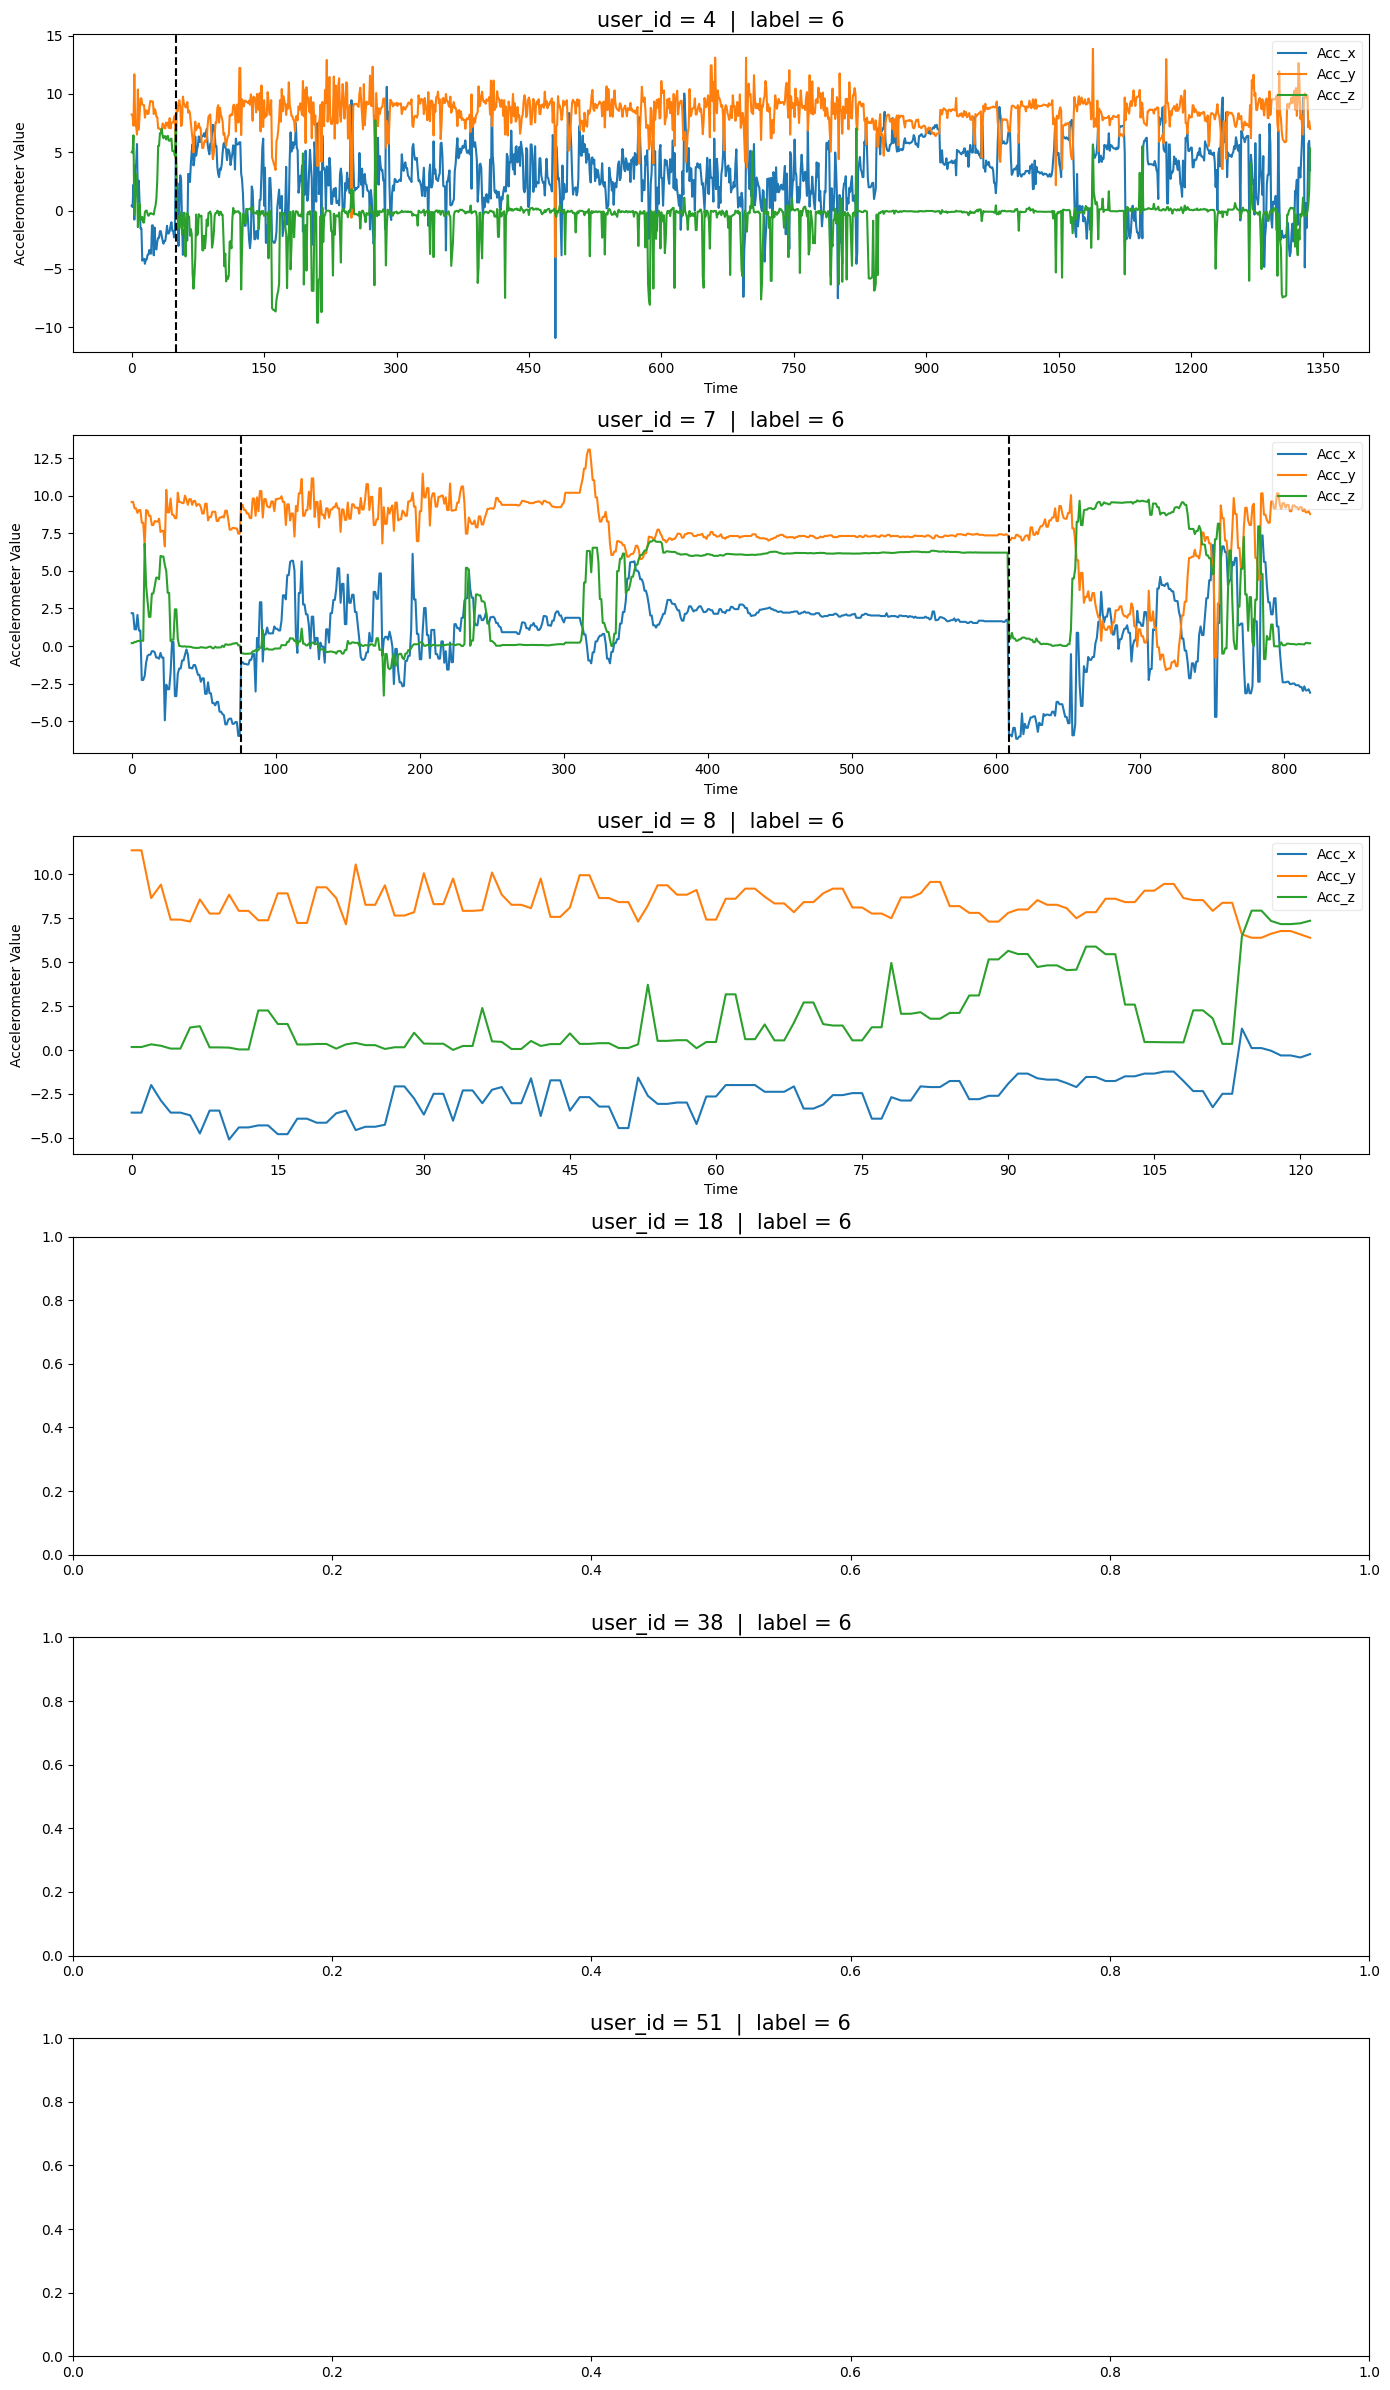

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [35 30 10]
label = [1]


user_id = [7]
take = [93]
label = [1]


user_id = [8]
take = [624 566 614]
label = [1]


user_id = [18]
take = [774]
label = [1]



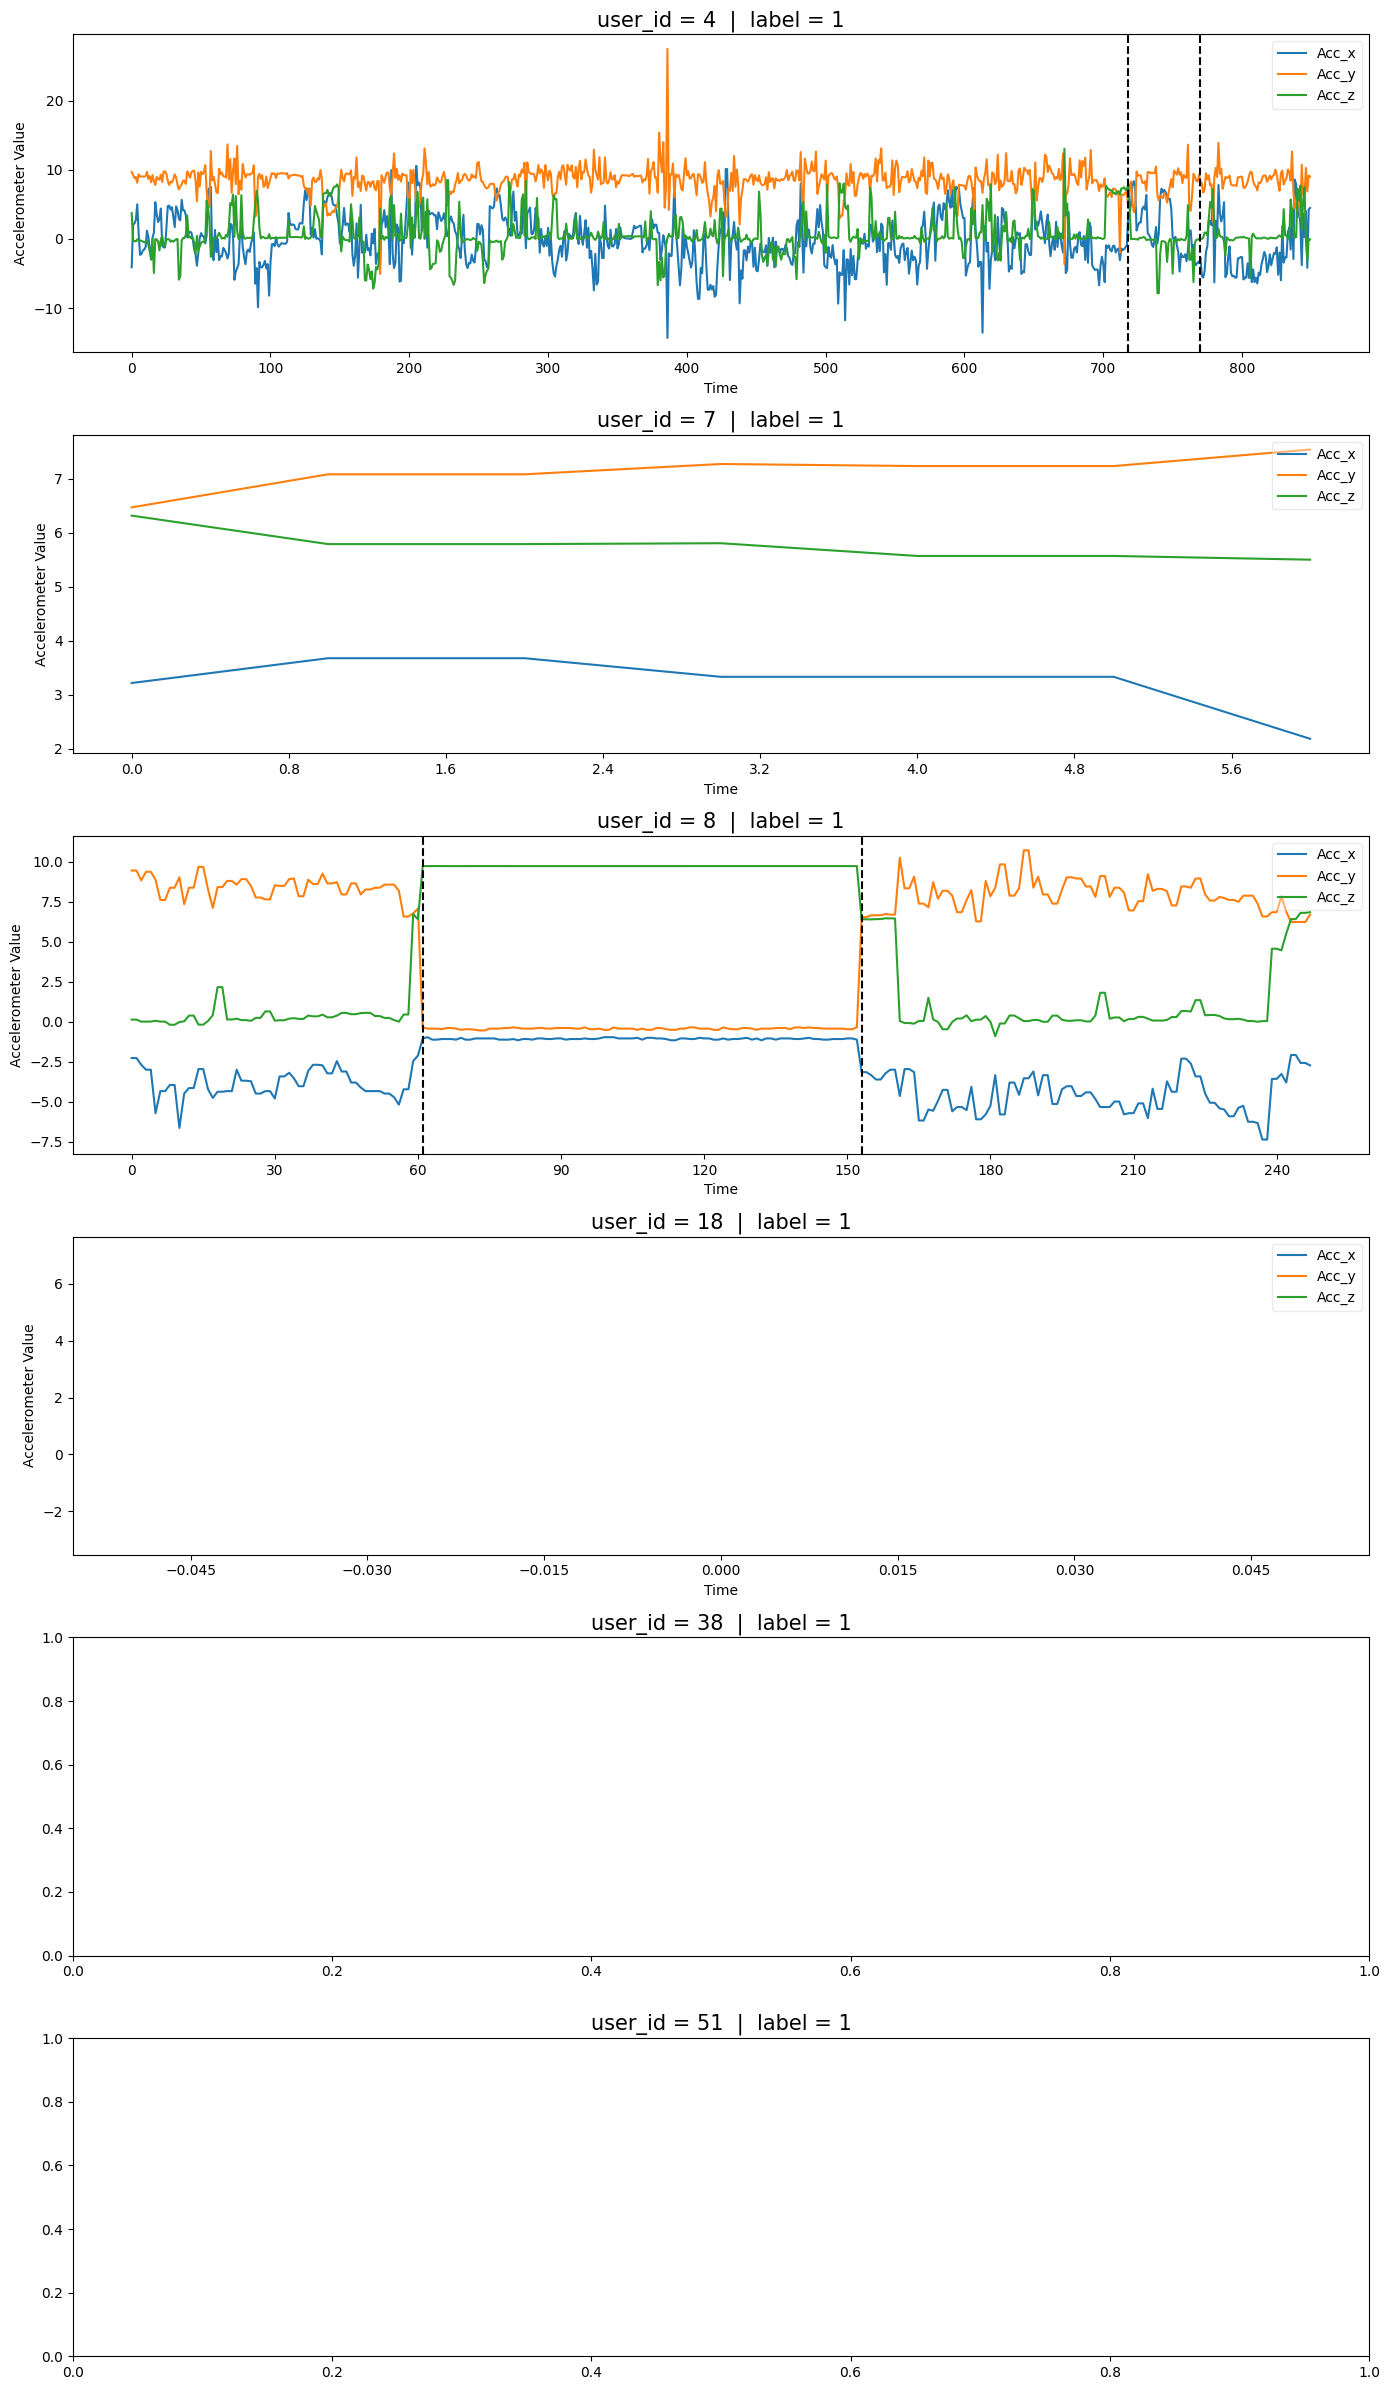

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [14 16 12]
label = [12]


user_id = [7]
take = [437 161 497]
label = [12]


user_id = [8]
take = [680 646 602]
label = [12]


user_id = [51]
take = [918 902 897]
label = [12]



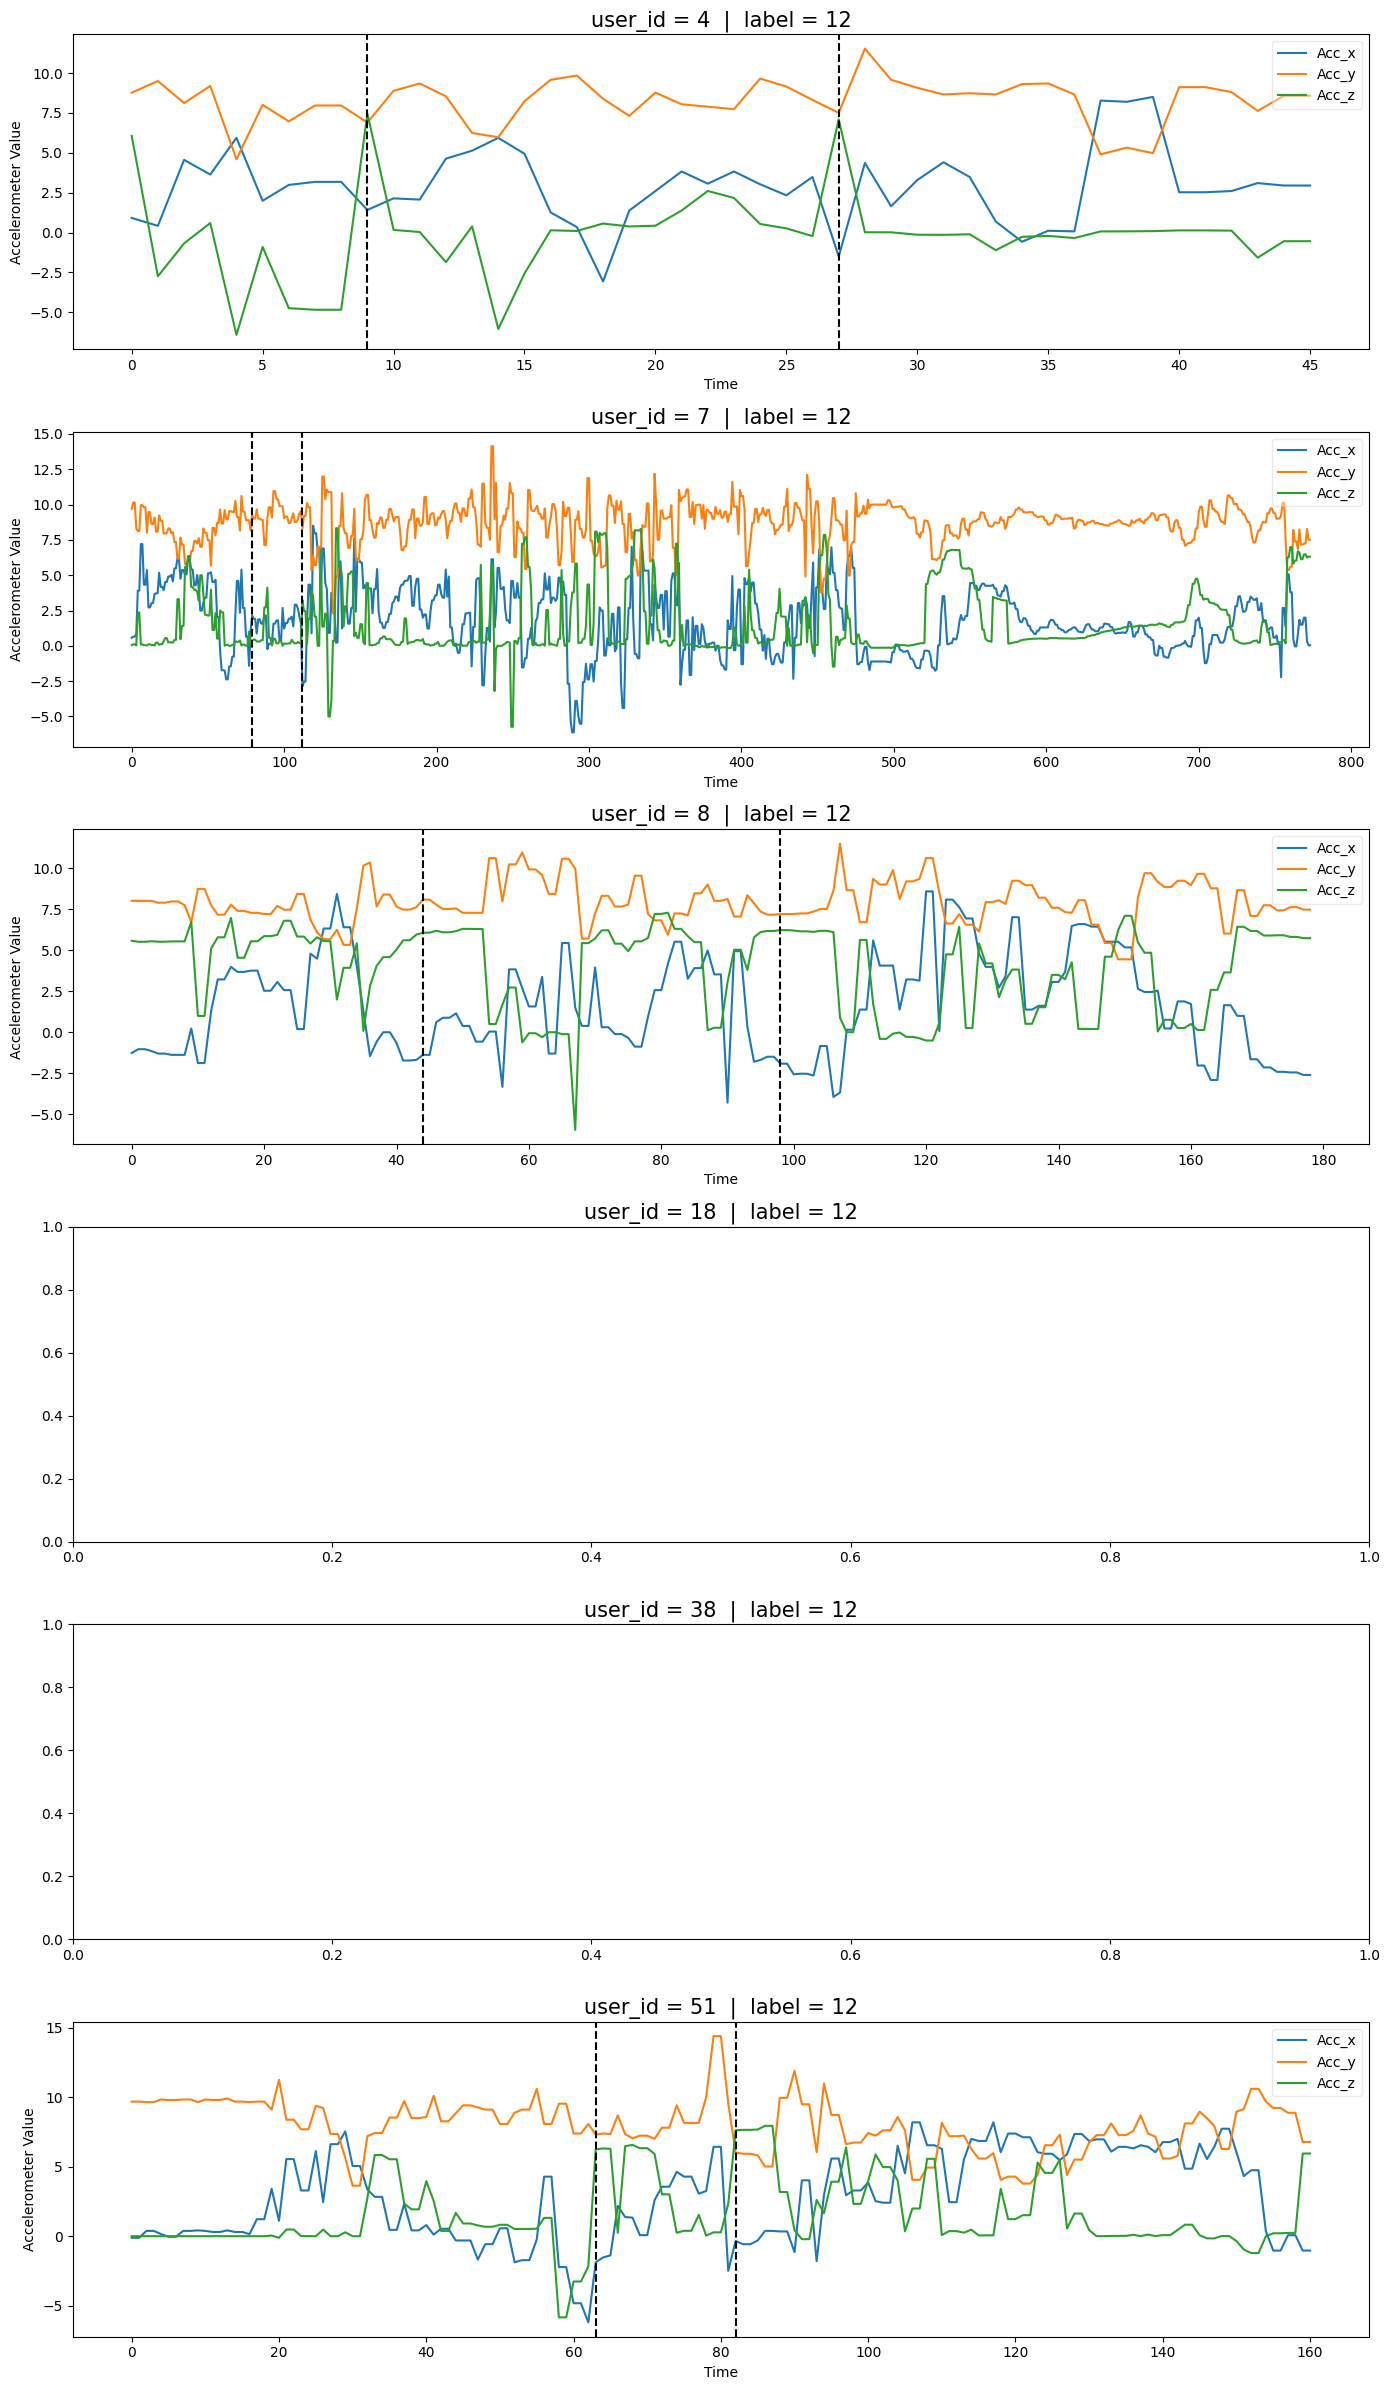

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [28 37]
label = [2]


user_id = [8]
take = [543 544 586]
label = [2]


user_id = [18]
take = [829]
label = [2]



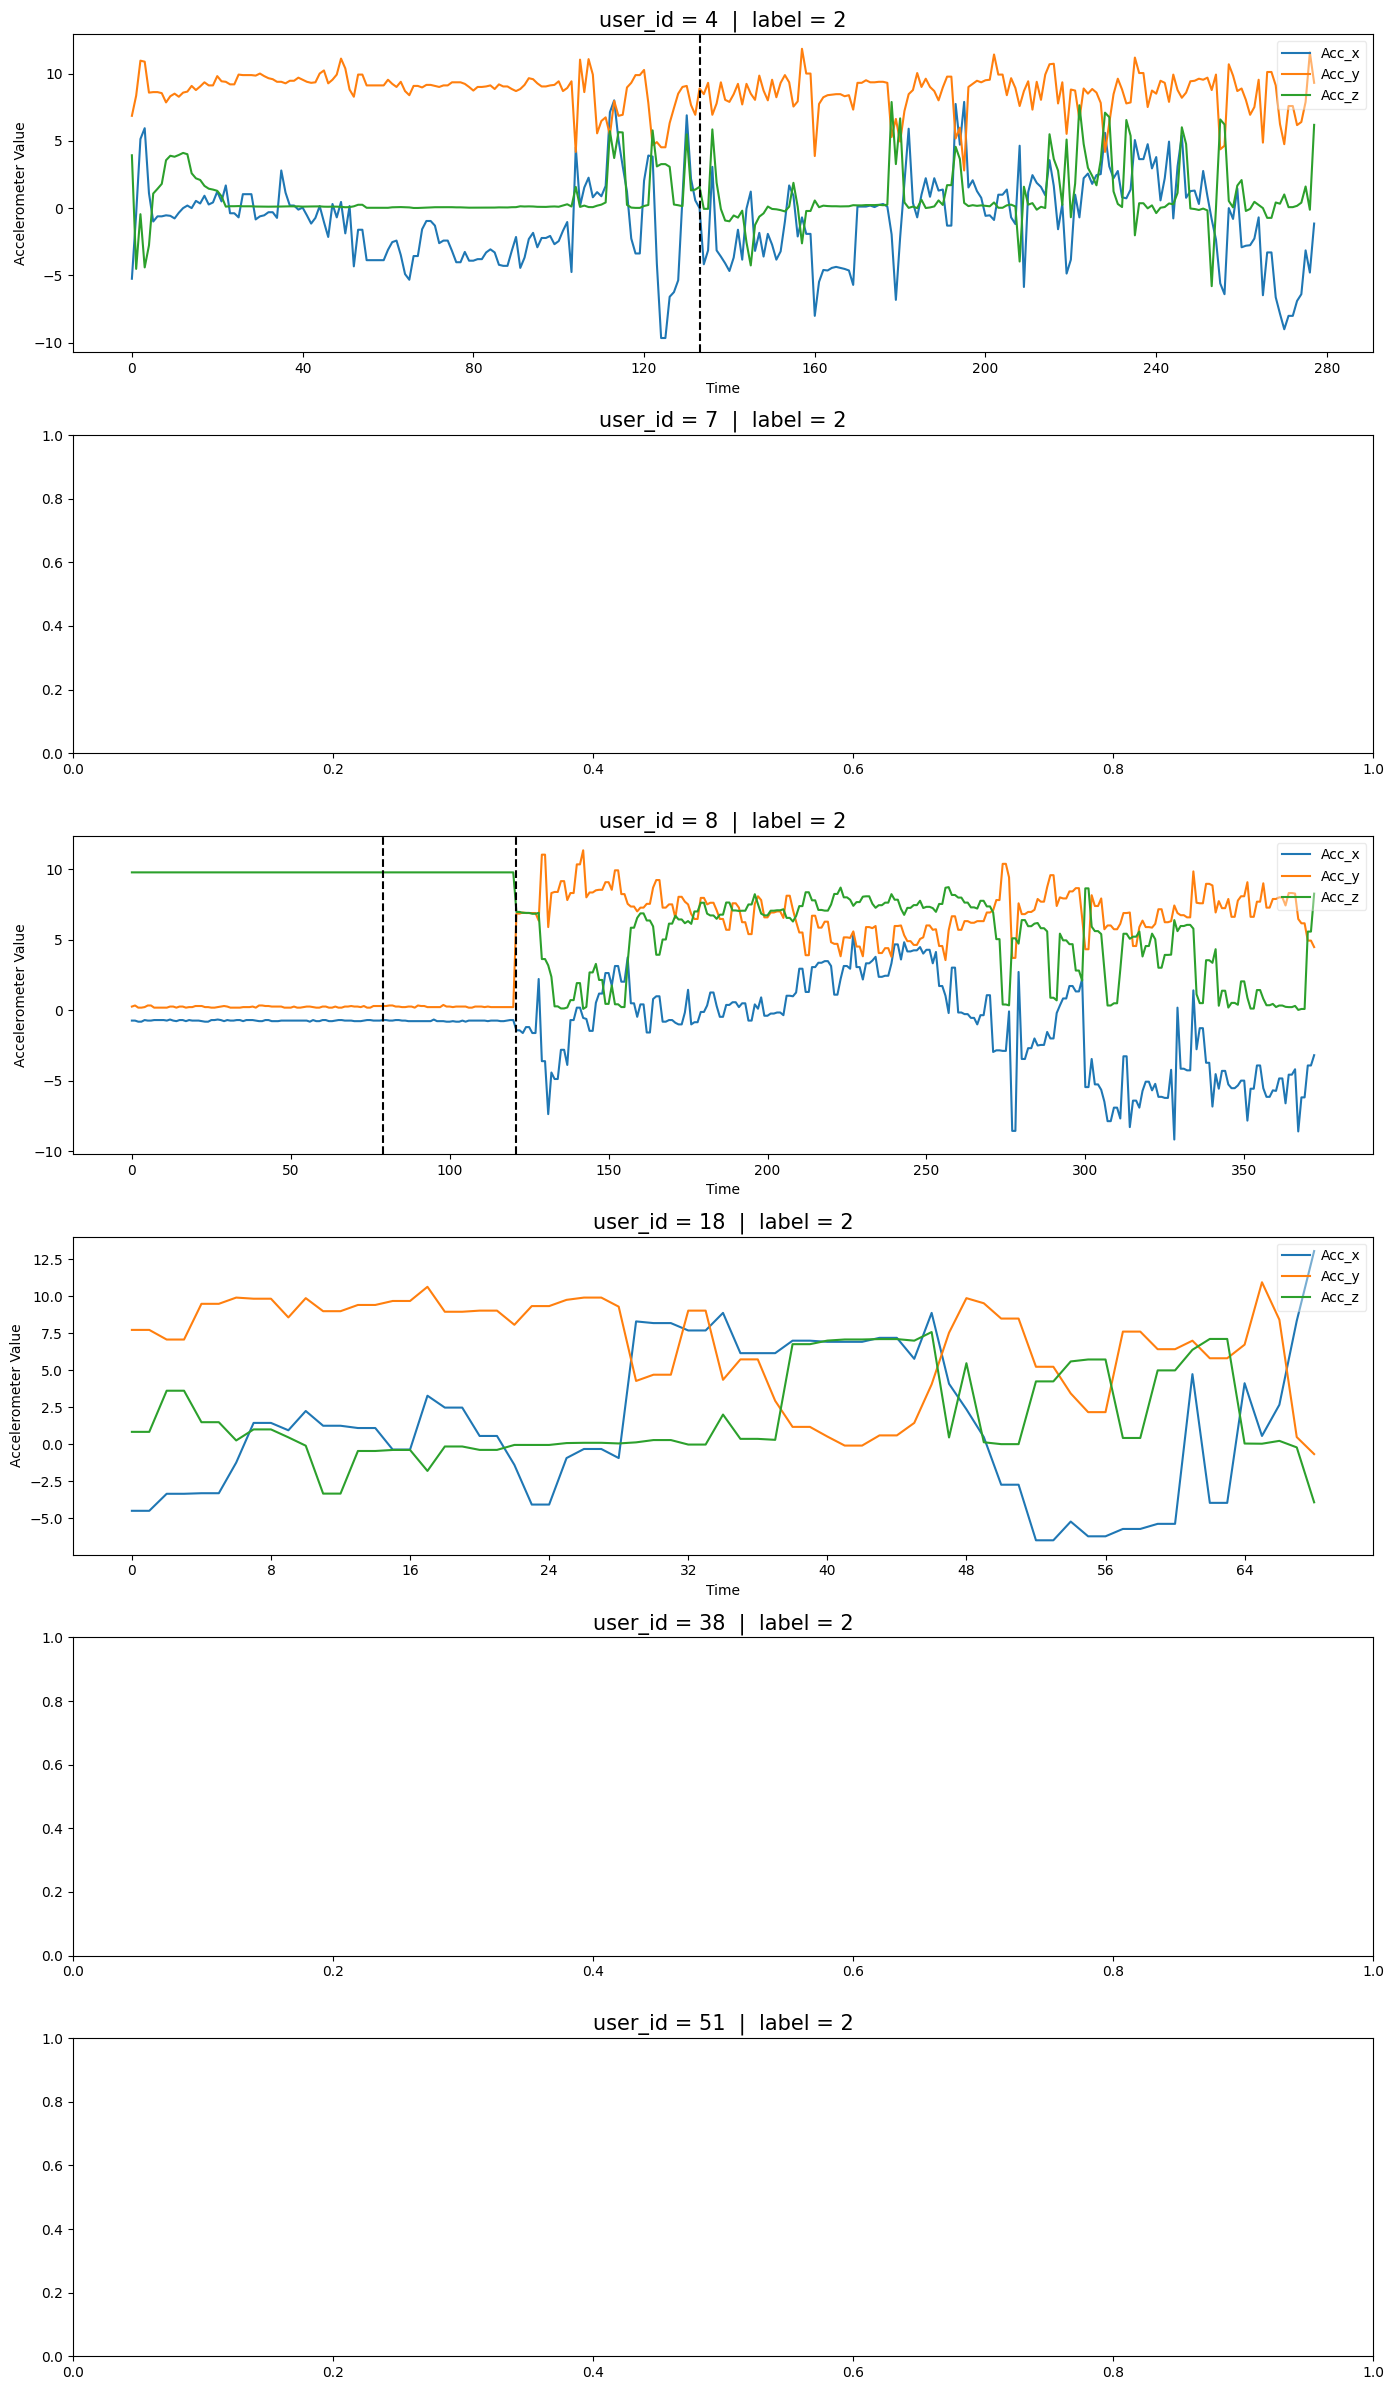

user_id:  [ 4  7  8 18 38 51]

user_id = [4]
take = [52]
label = [7]


user_id = [7]
take = [315 283 346]
label = [7]


user_id = [8]
take = [556 571 580]
label = [7]


user_id = [18]
take = [769 772 739]
label = [7]



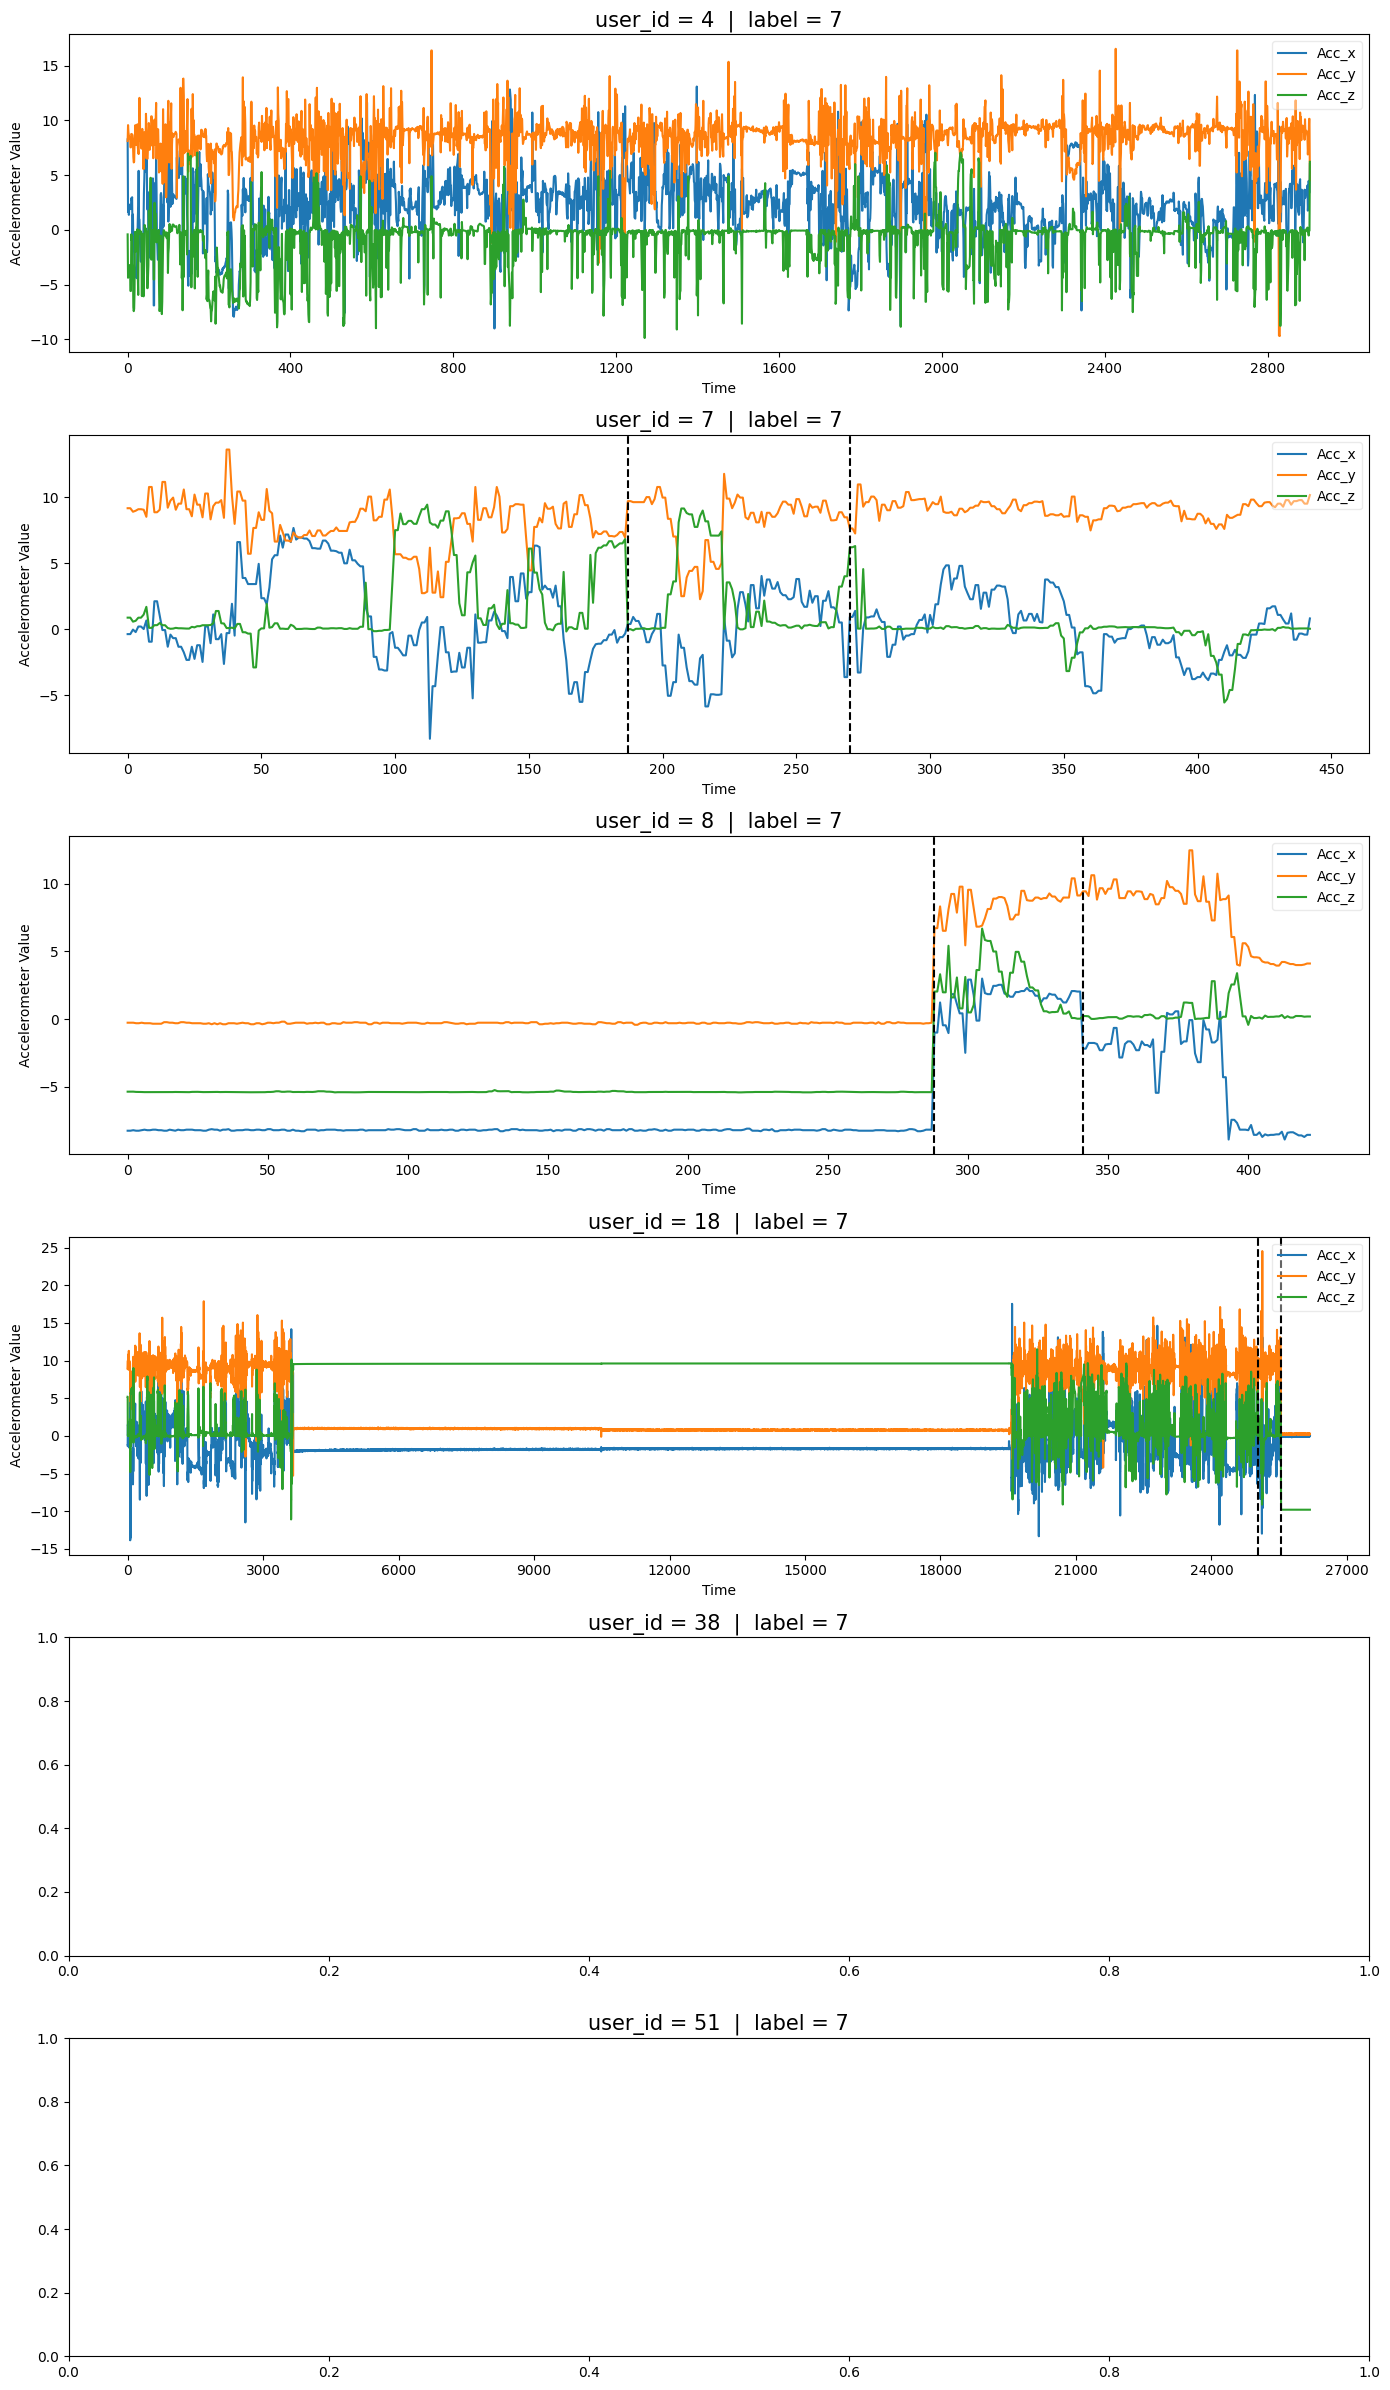

user_id:  [ 4  7  8 18 38 51]

user_id = [7]
take = [140 211 381]
label = [3]


user_id = [8]
take = [574]
label = [3]


user_id = [18]
take = [757 824 785]
label = [3]



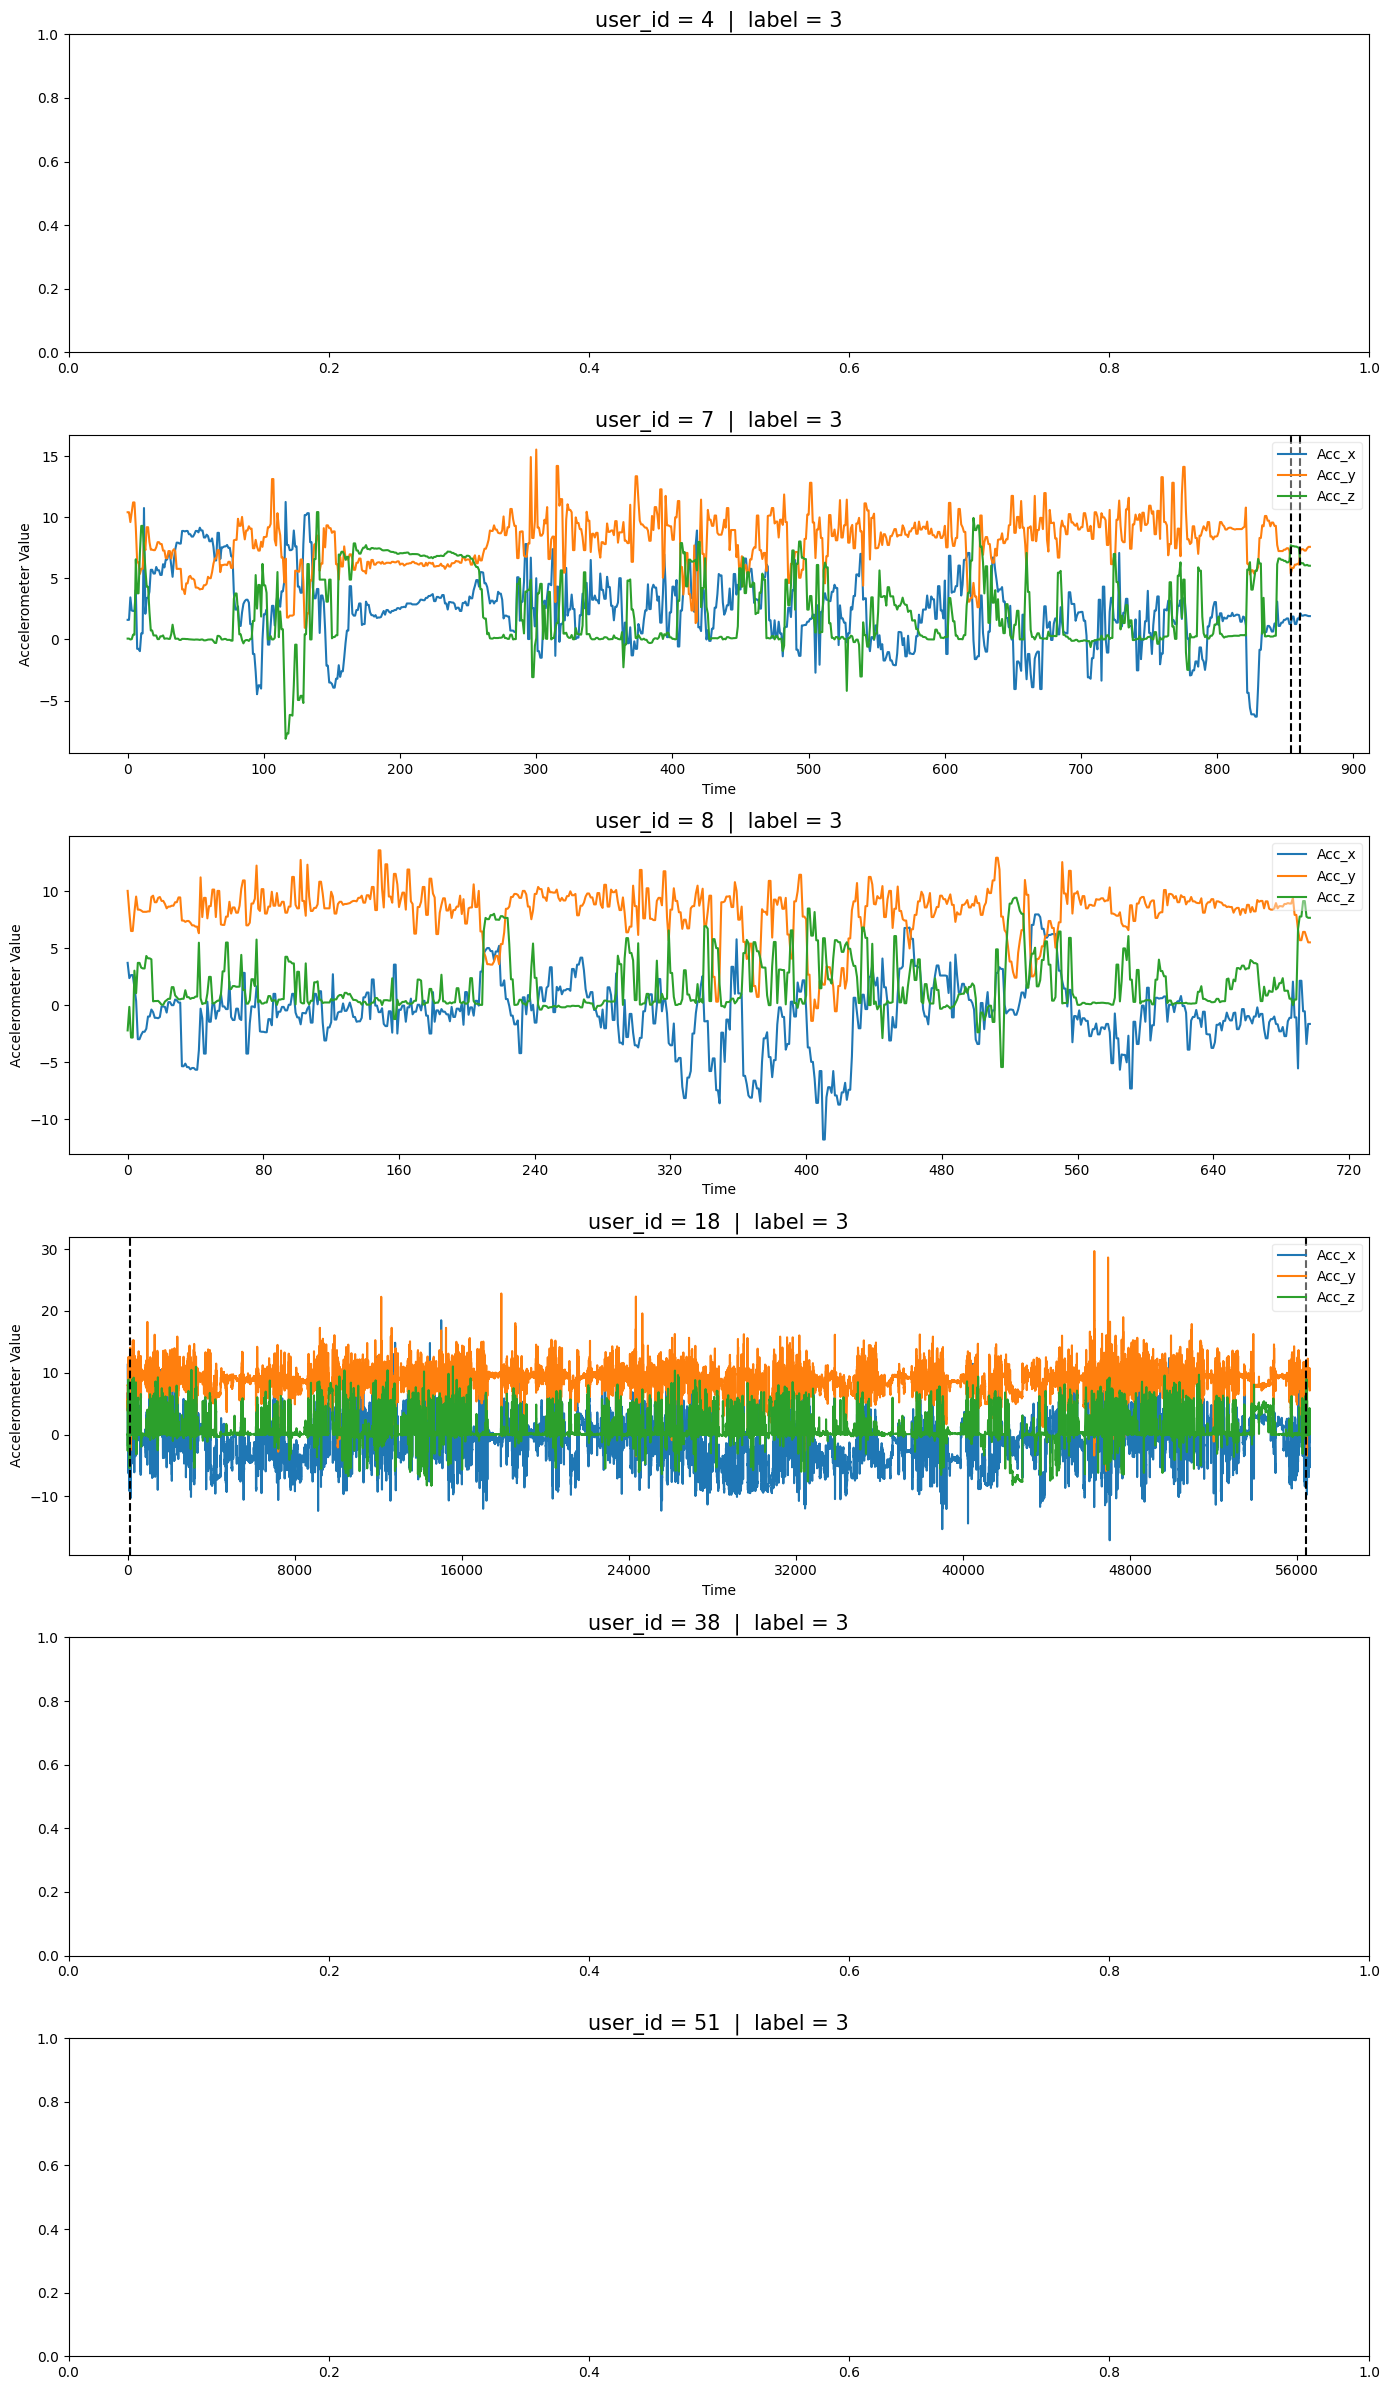

user_id:  [ 4  7  8 18 38 51]

user_id = [8]
take = [615 575 658]
label = [10]


user_id = [18]
take = [736]
label = [10]


user_id = [38]
take = [834]
label = [10]


user_id = [51]
take = [836 865 853]
label = [10]



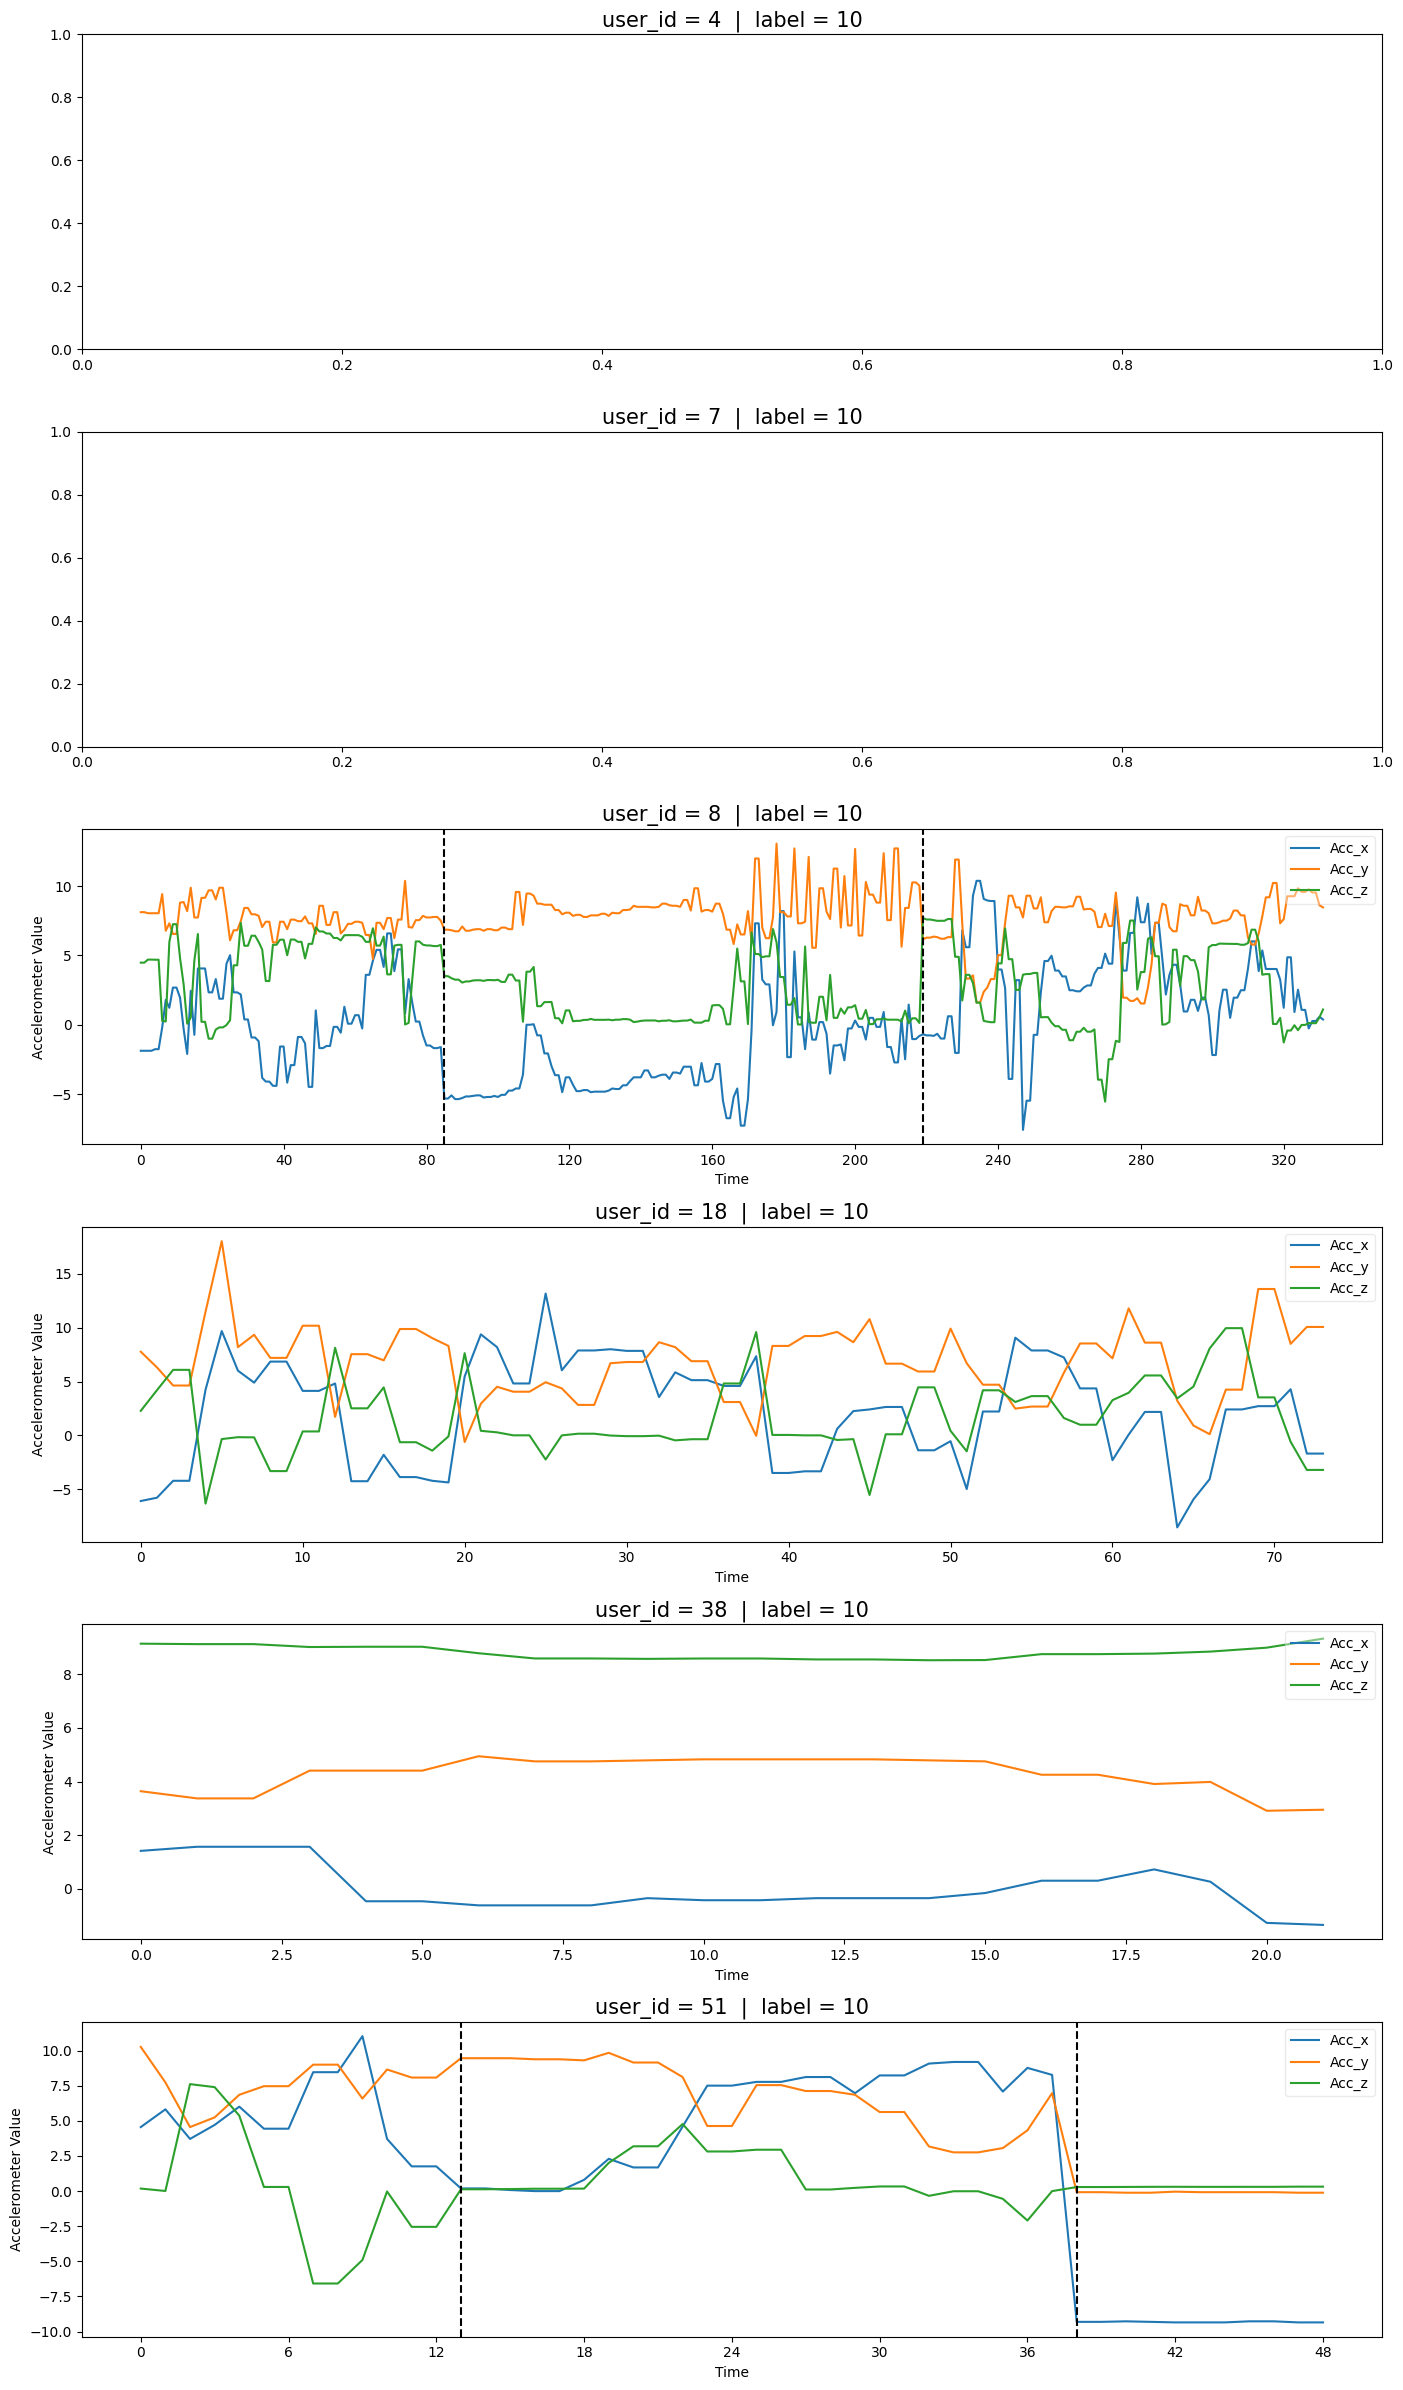

user_id:  [ 4  7  8 18 38 51]

user_id = [8]
take = [712 648 659]
label = [9]


user_id = [18]
take = [734 738 735]
label = [9]


user_id = [38]
take = [833]
label = [9]


user_id = [51]
take = [847 839 874]
label = [9]



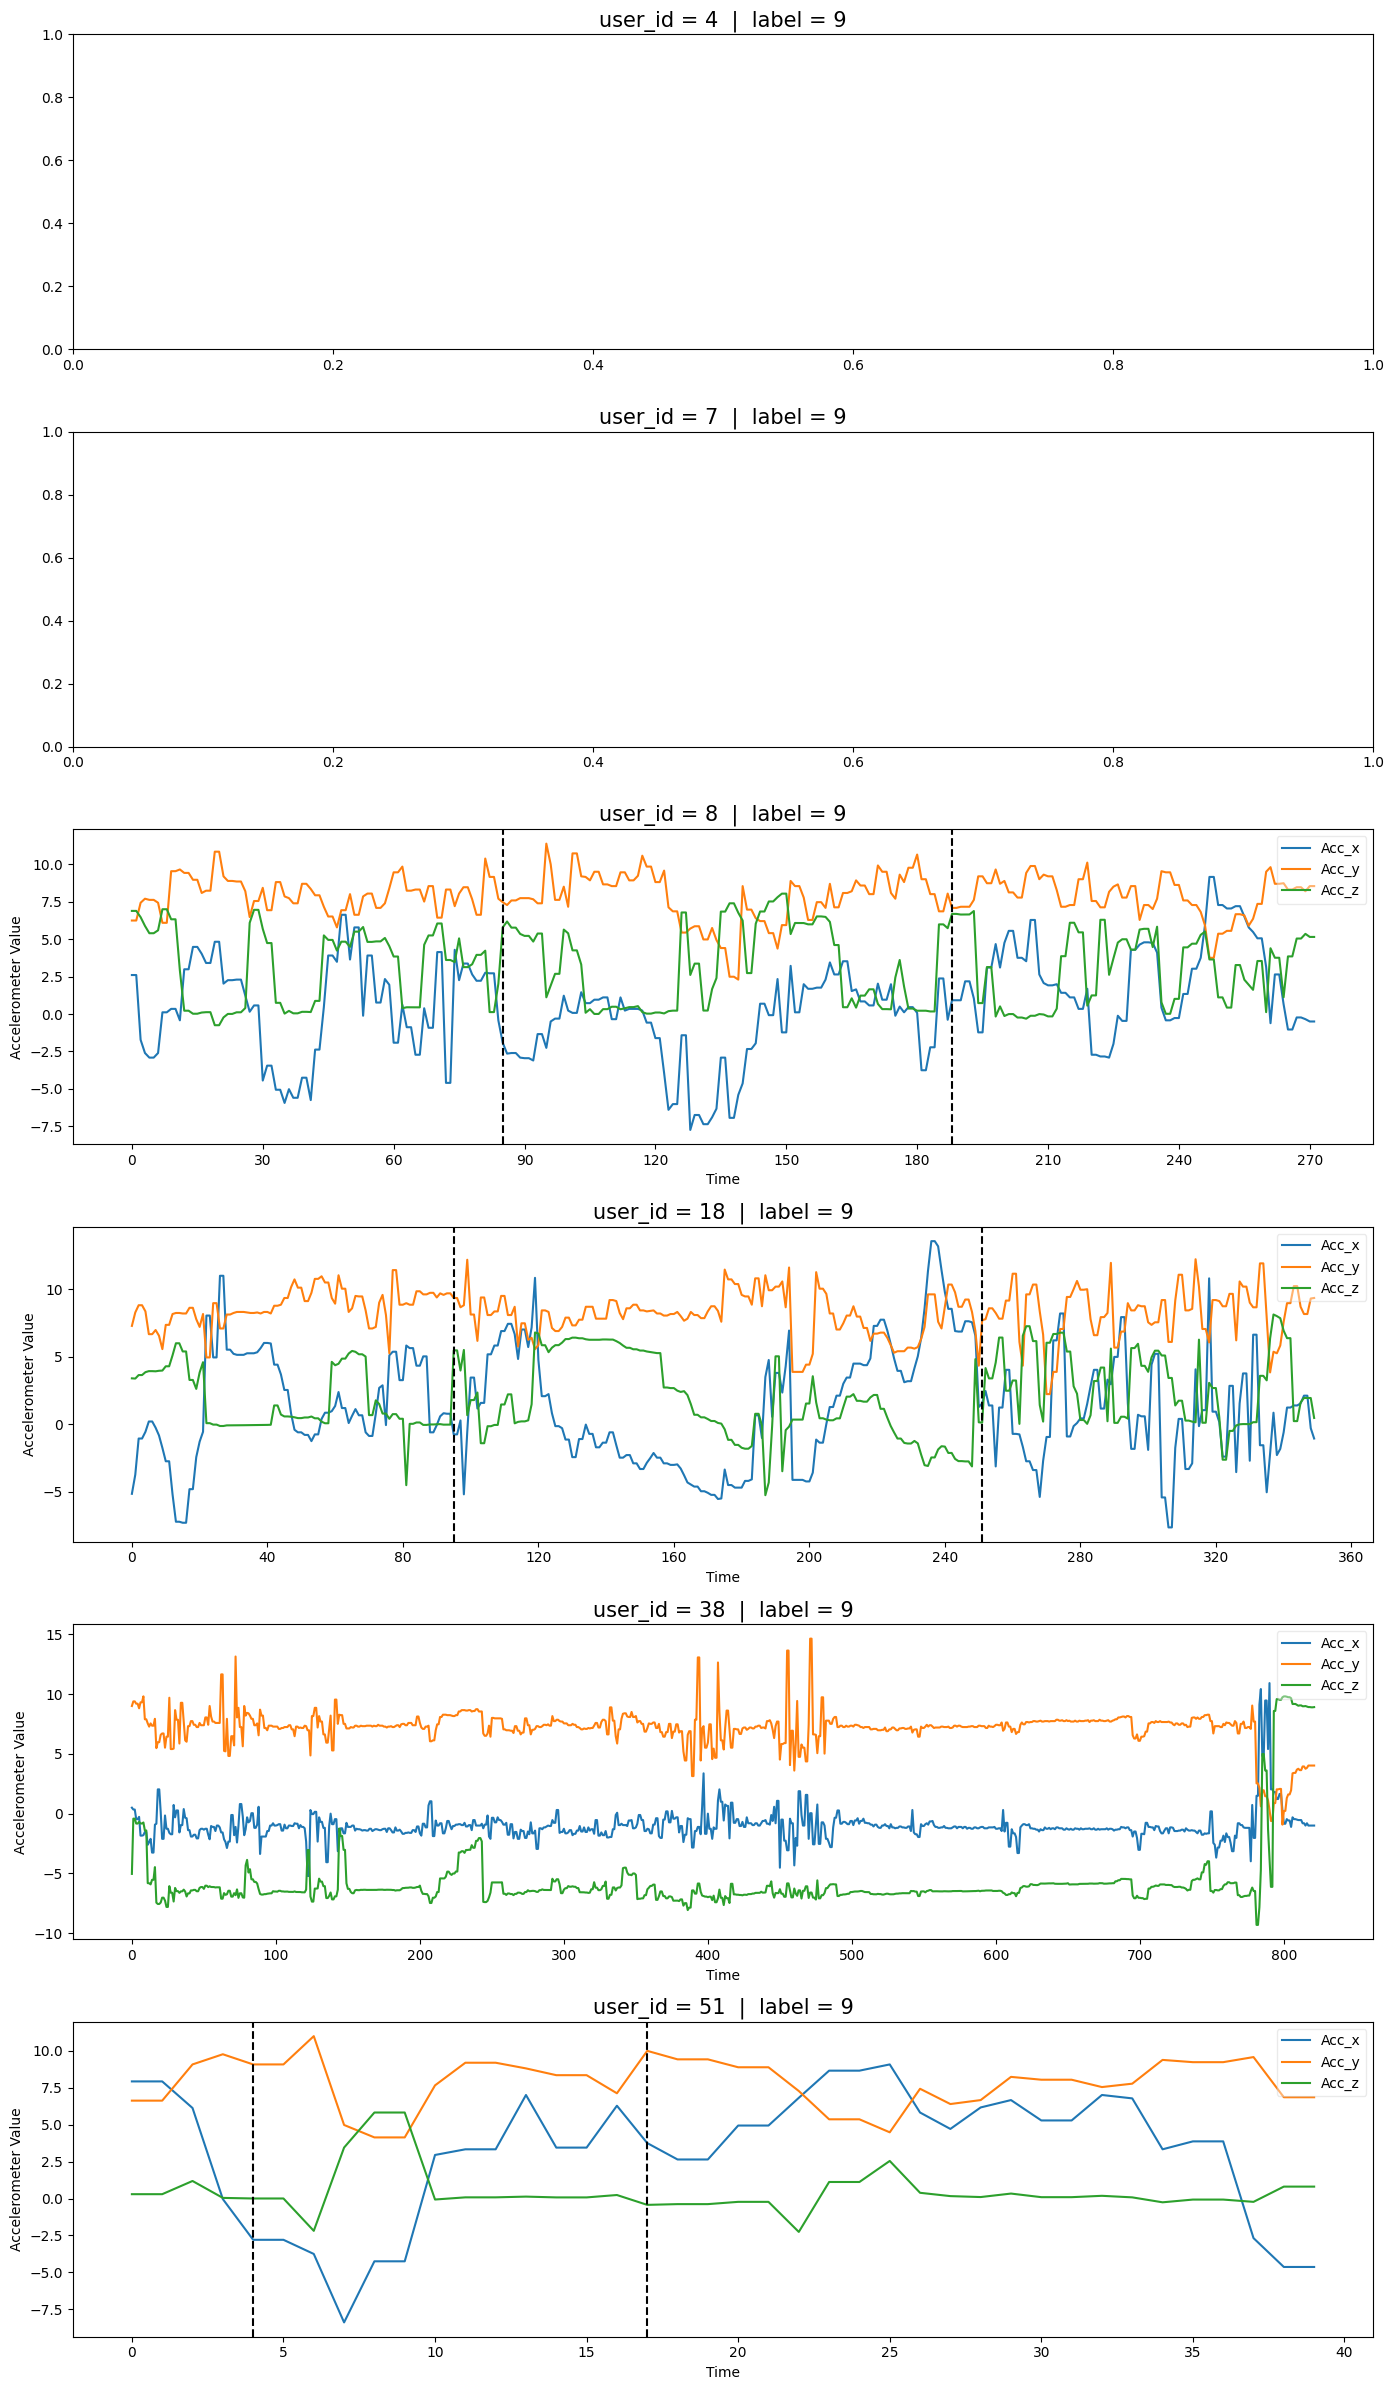

In [ ]:
# Plot the data
# for act in merged_data['label'].unique():
#   plot_activity_all_user(merged_data, label = act, savePath = path['Train_Field'])

plot_activity_all_user(merged_data, label = None, savePath = None)


---

######   HijiBiji
---



In [ ]:
#merged_data['label'].unique()
#merged_data.loc[merged_data['take'] == 479].reset_index(drop=True)
merged_data.loc[(merged_data['user_id'] == 51) & (merged_data['label'] == 8)].reset_index(drop=True) 
#merged_data.label.unique()

Empty DataFrame
Columns: [user_id, datetime, take, x, y, z, label]
Index: []